# Proyecto Final - Data Scientist Coderhouse


**Análisis de producción de pollos parrilleros**


**Pio Caceres**


*La producción de pollos parrilleros en Argentina se encuentra concentrada en unas pocas empresas y la mayoría de ellas son de tipo familiar. Las más grandes realizan todos los procesos de la cadena de producción: desde las cabañas de la genética (Abuelos) hasta la distribución en los puntos finales del producto terminado: cadenas de supermercados, minoristas, consumidor directo y puertos (productos de exportación). Los pollos parrilleros se crían en granjas conformadas por galpones en los que se ingresan los animales recién nacidos (pollitos BB), las empresas productoras proveen todos los insumos necesarios para la crianza (alimento, medicamentos, desinfectantes, material de cama, servicios de limpieza, entre otros) y el encargado o dueño de la granja (integrado) se ocupa del manejo de las aves y su ambiente (provisión de agua, alimento, condiciones de temperatura y humedad, etc.). La duración del ciclo de crianza es de aproximadamente 48 días y el peso final de alrededor de 2.8 Kilos. La empresa productora retira los animales para llevarlos al frigorífico. 
La producción se analiza en función de la eficiencia productiva de cada crianza. Una mayor eficiencia significa lograr un animal de mayor peso con el menor consumo de alimento posible ya que el alimento constituye aproximadamente el 70% del costo de producción. La relación alimento consumido/peso final logrado es la conversión alimenticia. El impacto de la mortalidad es negativo y es creciente con la edad: a mayor edad, más cantidad de alimento habrá consumido el ave sin producir kilos.*
*La edad a faena está condicionada por la demanda del sector de ventas: tamaño de las aves, cantidad de kilos; por el ritmo de crecimiento (ganancia media diaria de peso) y por las condiciones sanitarias (enfermedades).
El valor de conversión como indicador productivo tiene la limitación de que no puede ser utilizado para comparar resultados entre granjas y períodos de tiempo por depender de la edad, el peso final y la mortalidad.
Debido a ello se utilizan otros parámetros como la ganancia media diaria de peso (A.D.), la conversión ajustada a un peso teórico (Conversión aj. a 2.7 kg) y la relación Peso/Conversión.*

*El resultado productivo será la resultante de la interacción de los siguientes factores:
•La genética: La línea genética de las aves, el origen y edad de los reproductores (padres), el tipo de huevo que dio origen a los pollitos BB.
•La nutrición: La composición de la dieta, la calidad de las materias primas utilizadas.
•El ambiente: El tipo de galpón de crianza (convencional, ambiente controlado), las condiciones de temperatura y humedad y la disponibilidad de recursos: comederos, bebederos, ventiladores, etc.
•La sanidad: Planes de vacunación y salud intestinal, medicaciones, lavado y desinfección, aplicación de medidas de bioseguridad, etc.
El planteo del presente trabajo es analizar los diferentes factores que impactan sobre la ganancia media diaria de peso y sugerir acciones de manejo para mejorar los valores de este indicador productivo para una empresa de Argentina.*

**Definición de objetivo**
El objetivo del presente trabajo es detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos. 

**Contexto comercial**
El retorno económico de la empresa productora de pollos parrilleros depende de la obtención de mejores resultados productivos. A mayor ganancia de peso diaria, por ejemplo, el consumo total de alimento será menor disminuyendo el costo. Otro impacto positivo del aumento de la ganancia de peso diaria es que se reduce la edad a faena de los animales ya que se alcanza el peso deseado en menor cantidad de días. Esta reducción de días permite: liberación de superficie de producción (metros cuadrados de galpón, rotación), menor propensión a sufrir enfermedades y accidentes (por ejemplo cortes de luz). También el dueño de la granja tiene menores costos de luz y gas y por lo tanto obtiene mayor retorno económico al final de la crianza.

**Motivación y audiencia**
La motivación del presente trabajo es hallar relaciones entre los datos provistos por la empresa para mejorar los resultados productivos, esta dirigido a los directivos y los mandos superiores encargados de ejecutar las acciones de cada área productiva.

**Problema comercial**
La empresa plantea los siguientes interrogantes: ¿Por qué la ganancia de peso no es similar en todas las granjas? ¿Por qué tampoco es uniforme a lo largo del año? ¿Es posible predecir el crecimiento en el futuro? ¿El consumo de alimento es el esperado? ¿Qué tiene mayor impacto, el consumo de alimento o las condiciones del ambiente? ¿Es posible mejorar los valores de ganancia de peso manteniendo iguales las condiciones de genética, nutrición y ambiente (en el sentido estricto de la localización geográfica de las granjas)?

**Contexto analítico**
La empresa ha provisto un archivo excel con información de resultados y otros parámetros con localización geográfica, tipo de granja y zona de producción.

**Exploración de datos**
Se confeccionarán gráficos y tablas para explorar los datos provistos y se aplicarán diferentes modelos de *machine learning* para detectar relaciones entre las variables.



# Importación de librerías

Se importaron las librerias necesarias para el presente trabajo.

In [163]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from numpy import mean
from numpy import std
from prettytable import PrettyTable
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.express as px
import requests
import seaborn as sns
import statsmodels.api as sm
import xlsxwriter
import ydata_profiling
import scipy as sp


# Para modelaje:
from imblearn import FunctionSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.spatial import distance
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
import pickle
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

! pip install xgboost

%pip install ipython-autotime
%load_ext autotime
%matplotlib inline


plt.style.use('default')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16.9 s (started: 2023-08-02 19:52:14 -03:00)



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Conjunto de datos

Para el presente análisis se utilizó una tabla de un archivo Excel provisto por la empresa. En ella se registran los resultados finales de la producción. Contiene además datos sobre genética, nutrición y sanidad.

Se obtuvo el archivo Excel seleccionando solo las columnas que la empresa podía compartir públicamente (se quitaron columnas con datos personales y direcciones).

In [4]:
#Ingresos semanales compilado registra resultados finales de la producción en la pestaña BASE. Contiene además datos de genética, nutrición y sanidad.
# Se Genera una lista de índices de columnas para incluir todas las columnas
all_columns = list(range(67))

# Especifica los índices de las columnas a excluir
excluded_columns = [0, 2, 58, 61, 62, 63]

# Genera una lista de índices de columnas para incluir todas las columnas excepto las excluidas
included_columns = [col_index for col_index in all_columns if col_index not in excluded_columns]

df = pd.read_excel(r"C:\Users\ebover\OneDrive - FRIGORIFICO DE AVES SOYCHU S.A.I.C.F.I.A\ingresos semanales compilado.xlsx",sheet_name='BASE', skiprows=1 , usecols=included_columns)

time: 16 s (started: 2023-08-02 19:16:31 -03:00)


## Data Wrangling 
Se quitaron de la tabla valores erróneos de ganancia de peso (por errores en carga de datos); edades mayores a 70 días por considerarse fuera de estándar; y resultados de crianzas para exportación, ya que las curvas de crecimiento en esas condiciones son diferentes.

In [5]:
df.drop(df[(df['A.D.'] >100)].index, inplace=True) #Se eliminan valores erróneos
df.drop(df[(df['Edad'] >70)].index, inplace=True) #Se elimninan edades fuera de estándar
df.drop(df[(df['Destino'] =='EXP')].index, inplace=True) # se eliminan crianzas de pollos enviados a exportación

time: 31 ms (started: 2023-08-02 19:16:47 -03:00)


# Análisis exploratorio de datos

La tabla posee 14.844 filas, cada una de las cuáles representa una crianza de una granja. La tabla tiene 61 columnas con información sobre las características de la granja, su ubicación y los resultados de producción obtenidos. Posee valores desde el año 2015 hasta el primer semestre del año 2023.

In [6]:
df.shape

(14844, 61)

time: 15 ms (started: 2023-08-02 19:16:47 -03:00)


In [7]:
df.head()

,granja,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,Kg. Alim.,...,dada de baja,Cuartil EFS 2019,% desvío consumo std,EFS según ranking 19,Índice,zona climática,Cuartil EFS 2021,consumo total,"Pes conv 2,7",zona prod
0,2544,2014-11-13,36000,34964,0.55,2.88,-0.33,93360,2.670175,198673,...,NaN,I,-10.389276,NaN,6,Arrecifes,NaN,5.682216,1.262878,BA
1,2558,2014-11-07,57500,54217,0.83,5.71,-0.26,145260,2.679233,335800,...,NaN,IV,-14.867094,NaN,7,Arrecifes,NaN,6.193629,1.164476,BA
2,2761,2014-11-13,39000,36483,0.92,6.45,-0.48,100360,2.750870,228500,...,NaN,I,-1.227077,NaN,8,25 de mayo,NaN,6.263191,1.194771,BA
3,2524,2014-11-14,30000,28231,1.35,5.90,1.07,77514,2.745705,176157,...,NaN,I,-1.595289,NaN,15,Arrecifes,NaN,6.239843,1.196094,BA
4,2741,2014-11-14,42000,38912,0.76,7.35,0.19,120920,3.107525,274466,...,x,NaN,3.530095,NaN,21,Arrecifes,NaN,7.053505,1.265246,BA


time: 94 ms (started: 2023-08-02 19:16:47 -03:00)


## Tabla exploratoria

La tabla posee datos con valores continuos como la ganancia de peso (A.D.), la mortalidad, los kilos de alimento consumido; y valores categóricos como el tipo de granja, la zona de producción, entre otros. Posee además datos de fecha de inicio y fin de crianza y variables numéricas con funciones categóricas como por ejemplo «mes ingreso». Las columnas que poseen valores nulos no serán consideradas en el presente análisis. 

In [8]:
def df_explore(df):
    # Tabla de descripción de las principales características de cada columna de un conjunto de datos
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Variable',
                     'Tipo',
                     'Cant. No Nulos',
                     'Cant. Nulos',
                     '% Nulos',
                     'Valores Únicos',
                     'Ejemplo',
                    ])

    for c in df.columns:
        t.add_row([c,                                                                                         # Variable
                   df[c].dtype,                                                                               # tipo
                   len(df[c])-np.sum(df[c].isna().sort_values(ascending=False)),                              # Cant. No Nulos
                   np.sum(df[c].isna()),                                                                 # Cant. Nulos
                   np.round(df[c].isna().sort_values(ascending=False).sum()/len(df)*100, 2),        # % Nulos
                   np.count_nonzero(df[c].unique()),                                                          # Valores Únicos
                   df[~df[c].isnull()][c].iloc[0],                                                            # Ejemplo
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (14844, 61)


+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|           Variable           |      Tipo      | Cant. No Nulos | Cant. Nulos | % Nulos | Valores Únicos |       Ejemplo       |
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|            granja            |     int64      |     14844      |      0      |   0.0   |      754       |         2544        |
|          Primer BB           | datetime64[ns] |     14844      |      0      |   0.0   |      1994      | 2014-11-13 00:00:00 |
|          Cantid. BB          |     int64      |     14844      |      0      |   0.0   |      2407      |        36000        |
|           A Faena            |     int64      |     14844      |      0      |   0.0   |     12394      |        34964        |
|          % a 7 Días          |    float64     |     14844      |      0      |   0.0   |

## Análisis univariado

### Histograma de ganancia media diaria de peso (A.D.)

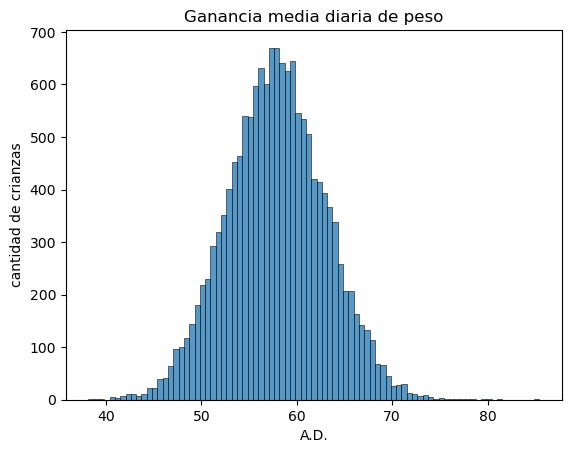

time: 828 ms (started: 2023-08-02 19:16:48 -03:00)


In [9]:
#Gráfico 1
#Histograma de Ganancia media diaria de peso#
ax=sns.histplot(data=df, x='A.D.')
ax.set(title='Ganancia media diaria de peso', ylabel='cantidad de crianzas');

In [10]:
df['A.D.'].mean()


57.84321296505432

time: 0 ns (started: 2023-08-02 19:16:49 -03:00)


La **ganancia media diaria de peso** es una medida que permite comparar resultados entre granjas y además permite ver la evolución de los resultados globales de la empresa a lo largo del tiempo. A mayor valor, mejor será el resultado. El valor medio es de **57.84** gramos de peso ganados promedio por día y los valores se distribuyen de manera normal. Este valor significa que, por ejemplo un animal de 47 días de edad logró un peso final de 2.71 kg.

## Análisis bivariado

### A.D. por año

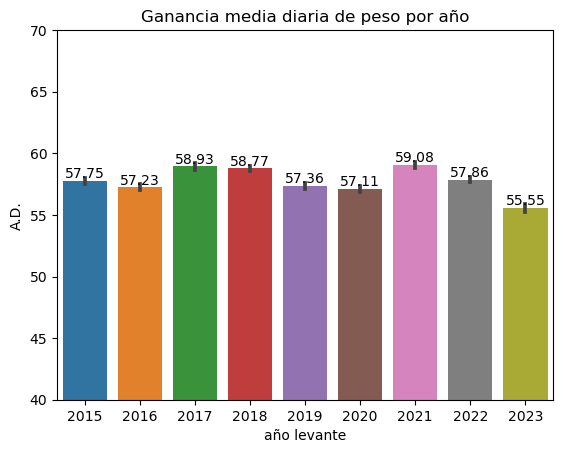

time: 813 ms (started: 2023-08-02 19:16:49 -03:00)


In [11]:
# Gráfico 2
# Ganancia media diaria de peso por año
ax=sns.barplot(data=df, x='año levante',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por año');

Se observa que las ganancias de peso de los años 2017 y 2021 fueron superiores al resto de los años analizados. 

### A.D. por estación del año

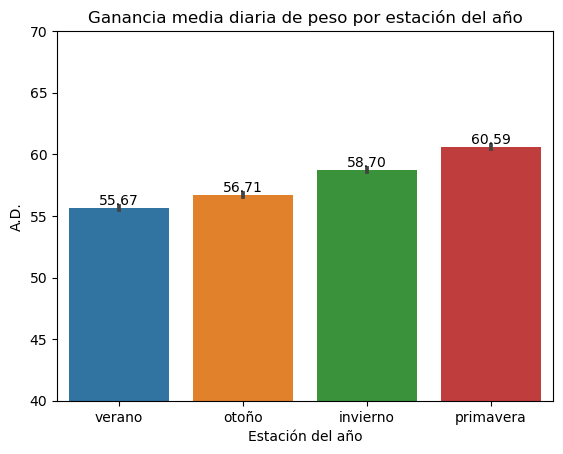

time: 469 ms (started: 2023-08-02 19:16:50 -03:00)


In [12]:
# Gráfico 3
# Ganancia media diaria de peso de por estación del año
ax=sns.barplot(data=df, x='Estación del año',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por estación del año');

Se observa que la ganancia de peso es variable según la estación del año en la que se desarrolle la crianza, las mayores ganancias de peso ocurren en primavera y las peores en verano dando indicios de que el clima afecta el resultado productivo.

### A.D. por mes del año

Se creó un diccionario para una mejor visualización de los meses del año en el gráfico y se generó un nuevo subset para correlacionar cada mes con la ganancia diaria de peso promedio.

In [13]:
# Se crea un diccionario para los meses del año
dic={1:'ene',2:'feb', 3:'mar',4:'abr',5:'may', 6:'jun',7:'jul',8:'ago',9:'sep', 10:'oct',11:'nov', 12:'dic'}
dic

{1: 'ene',
 2: 'feb',
 3: 'mar',
 4: 'abr',
 5: 'may',
 6: 'jun',
 7: 'jul',
 8: 'ago',
 9: 'sep',
 10: 'oct',
 11: 'nov',
 12: 'dic'}

time: 0 ns (started: 2023-08-02 19:16:50 -03:00)


In [14]:
#subset para mes del año
df_3=df[['A.D.','mes levante']]
df_3=df_3.groupby('mes levante').mean().reset_index().round(1)

time: 47 ms (started: 2023-08-02 19:16:50 -03:00)


In [15]:
df_3 = df_3.replace({'mes levante': dic})

time: 0 ns (started: 2023-08-02 19:16:50 -03:00)


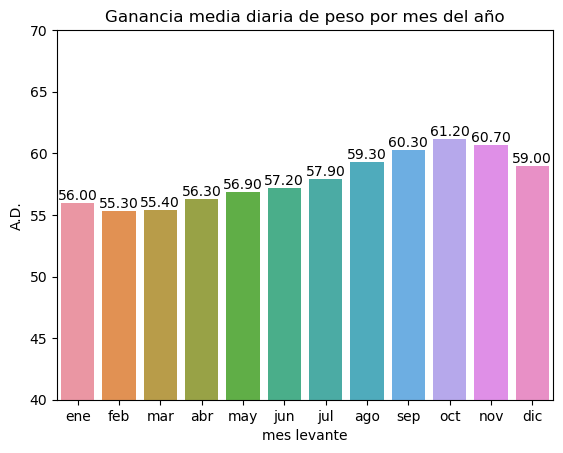

time: 235 ms (started: 2023-08-02 19:16:50 -03:00)


In [16]:
# Gráfico 4
# Ganancia media diaria por mes del año
ax=sns.barplot(data=df_3, x='mes levante',y='A.D.') 
ax.set(ylim=(40, 70))
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(title='Ganancia media diaria de peso por mes del año');

Se observan también diferencias en los valores de ganancia media diaria de peso en los meses del año. 
Debido a ello se realizó un análisis según los tipos de ventilación que poseen las granjas para detectar si las condiciones ambientales afectan de manera diferente a la ganancia de peso en cada uno.

Las granjas se clasifican en tres categorías:

**S**: Ventilación forzada: La ventilación del galpón se realiza a través de la entrada del aire por inlets o aberturas en la zona superior de los galpones y su posterior expulsión por extractores.

**N** Granjas con sistema de ventilación convencional con encendido manual de ventiladores y/o apertura y cierre de las cortinas laterales del galpón.

**MI**: Mixtas: Granjas que tienen ambos tipos de galpones.



### Histograma A.D. por tipo de ventilación

Para la generación del gráfico se crearon series, una para cada sistema.

In [17]:
# Datos para gráfico 5
serie1 =  df.loc[df['Ventilación forzada'] == 'N' ,'A.D.']
serie2 =  df.loc[df['Ventilación forzada'] == 'S' ,'A.D.']
serie3 =  df.loc[df['Ventilación forzada'] == 'MI' ,'A.D.']

time: 15 ms (started: 2023-08-02 19:16:51 -03:00)


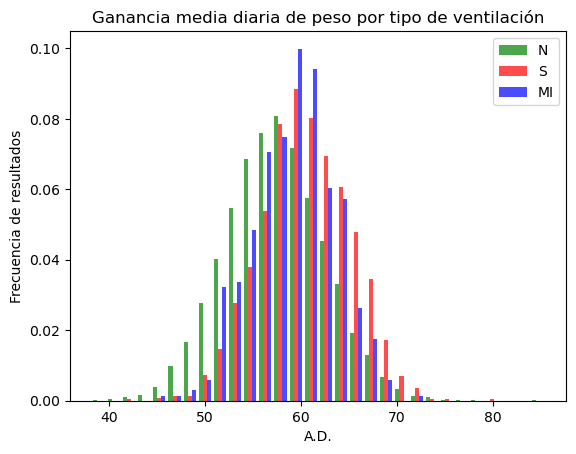

time: 359 ms (started: 2023-08-02 19:16:51 -03:00)


In [18]:
# Gráfico 5
plt.hist([serie1, serie2, serie3], bins=30, density= True, color=['green', 'red','blue'], alpha=0.7)
plt.title('Ganancia media diaria de peso por tipo de ventilación')
plt.xlabel('A.D.')
plt.ylabel('Frecuencia de resultados')
plt.legend(['N', 'S','MI']);

Los tres sistemas poseen una distribución normal. Se observa que la curva de las granjas convencionales (N) se encuentra desplazada a la derecha, es decir que posee menores valores de ganancia. Las granjas de sistemas mixtos y con ventilación forzada, si bien poseen mayores valores de ganancia de peso también tienen resultados bajos.

### A.D. por sistema de ventilación 

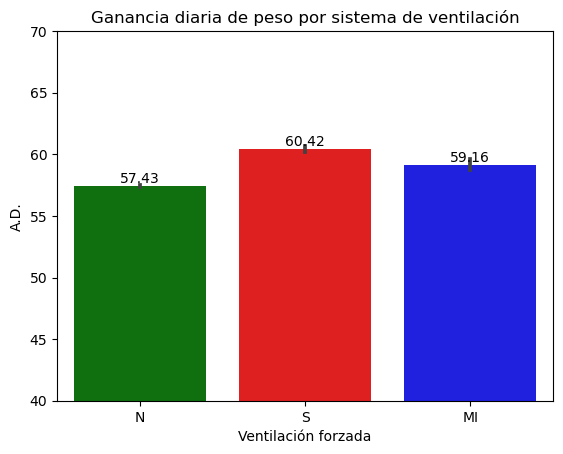

time: 344 ms (started: 2023-08-02 19:16:51 -03:00)


In [19]:
# Gráfico 6
ax=sns.barplot(data=df, x='Ventilación forzada',y='A.D.', order=['N','S','MI'], palette=['green', 'red','blue']) 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por sistema de ventilación');

De los dos gráficos anteriores se desprende que habría indicios de que el sistema de ventilación tiene impacto sobre la ganancia de peso de los animales, siendo el mayor valor promedio para el sistema de ventilación forzada. Si bien las diferencias en gramos pueden parecer despreciables (2.99 y 1.26 gramos), en el caso hipotético de tres animales de 47 días de edad en cada sistema habrá obtenido un peso final de 2.699, 2.839 y 2.780 kg en cada caso.

### A.D. por zona de producción

La empresa posee tres zonas de producción:

**BA**: Granjas ubicadas en la provincia de Buenos Aires.

**ER**: Granjas ubicadas en la provincia de Entre Ríos con excepción de la localidad de Crespo y alrededores. 

**CR**: Granjas ubicadas en la localidad de Crespo en Entre Ríos que se consideran una zona aparte por poseer características de estructura diferentes y por ser granjas adquiridas recientemente por la empresa (un año atrás).

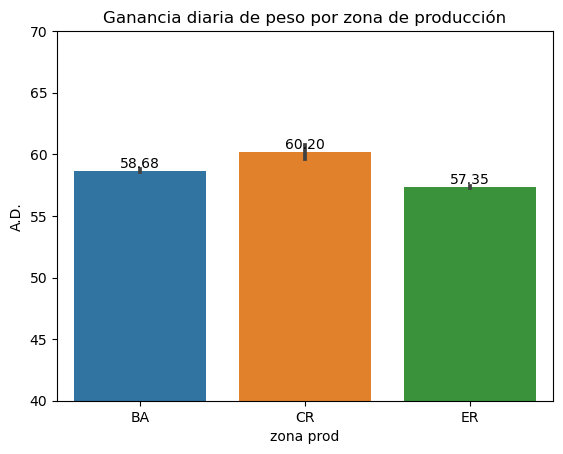

time: 375 ms (started: 2023-08-02 19:16:51 -03:00)


In [20]:
# Gráfico 7
ax=sns.barplot(data=df, x='zona prod',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por zona de producción');

A nivel de promedios, hay diferencias entre las zonas del país donde se encuentran ubicadas las granjas.

### A.D. por zona de producción dispersión

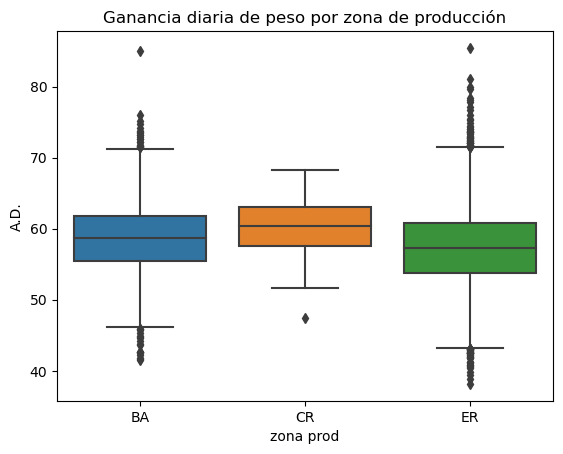

time: 172 ms (started: 2023-08-02 19:16:52 -03:00)


In [21]:
# Gráfico 8
ax=sns.boxplot(data=df, x='zona prod', y='A.D.') 
ax.set(title='Ganancia diaria de peso por zona de producción');

Los mejores resultados se encuentran en la zona de Crespo (CR), no solo porque tiene mayores valores de ganancia de peso sino también porque los resultados tienen menor dispersión y prácticamente no posee resultados atípicos. Es importante que de esta región solo se tienen resultados con un año de antigüedad.

### A.D y Consumo medio diario correlación

''

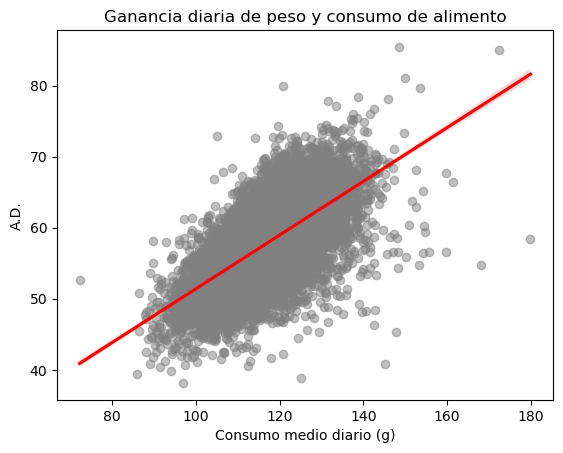

time: 2.92 s (started: 2023-08-02 19:16:52 -03:00)


In [22]:
# Gráfico 9
ax=sns.regplot(data=df, x = 'Consumo medio diario (g)', y = 'A.D.',
            scatter_kws = {"color": "grey", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
ax.set(title='Ganancia diaria de peso y consumo de alimento')

;

Se observa una alta correlación entre la ganancia media diaria de peso y el consumo de alimento. Debido a ello se utilizará la variable **Consumo medio diario de alimento (g)** como variable dependiente en los modelos de *machine learning* de regresión que se probarán. A continuación se confeccionarán también modelos de clasificación y agrupación para relacionar la variable ganancia de peso con otros indicadores productivos y con las características de las granjas, su ubicación y el efecto del clima.

# Preparación de los datos

Para la preparación de los datos se renombraron los valores de diferentes columnas para evitar duplicados al codificar las variables categóricas.

In [23]:
#Se renombran valores de diferentes columnas para evitar duplicados al codificar las variables categóricas
df.loc[df['Ambiente controlado'] == 'N', 'Ambiente controlado'] = 'no'
df.loc[df['Ambiente controlado'] == 'S', 'Ambiente controlado'] = 'si'
df.loc[df['zona climática'] == 'Arrecifes', 'zona climática'] = 'Arrecifes_BA'
df.loc[df['zona climática'] == 'Crespo', 'zona climática'] = 'Crespo_ER'



time: 15 ms (started: 2023-08-02 19:16:55 -03:00)


Luego se seleccionaron las variables que podrían tener impacto en el consumo de alimento. Se crea el subset **dfm** para tal fin.

In [24]:
#Creación del subset para los modelos de regresión
dfm=df[['Días de receso corregido','granja','Cantid. BB','% a 7 Días','% Mortan.','Edad','mes levante','Consumo medio diario (g)','Estación del año','Densidad','Ventilación forzada','Ambiente controlado','localidad','zona climática','zona prod' ]]
dfm.head()

,Días de receso corregido,granja,Cantid. BB,% a 7 Días,% Mortan.,Edad,mes levante,Consumo medio diario (g),Estación del año,Densidad,Ventilación forzada,Ambiente controlado,localidad,zona climática,zona prod
0,14,2544,36000,0.55,2.88,49.0,1,115.963592,verano,12.000000,S,no,San Pedro,Arrecifes_BA,BA
1,12,2558,57500,0.83,5.71,52.9,1,117.081839,verano,10.454545,N,no,Salto,Arrecifes_BA,BA
2,11,2761,39000,0.92,6.45,49.0,1,127.820226,verano,9.470000,N,no,Chivilcoy,25 de mayo,BA
3,9,2524,30000,1.35,5.90,49.0,1,127.343729,verano,10.000000,N,no,San Pedro,Arrecifes_BA,BA
4,10,2741,42000,0.76,7.35,51.0,1,138.304026,verano,10.769231,N,no,Arrecifes,Arrecifes_BA,BA


time: 62 ms (started: 2023-08-02 19:16:55 -03:00)


In [25]:
dfm.shape

(14844, 15)

time: 16 ms (started: 2023-08-02 19:16:55 -03:00)


Se mantienen la cantidad de filas y la cantidad de columnas se reduce a 15.

## Detección de outliers

### Consumo medio diario de alimento dispersión

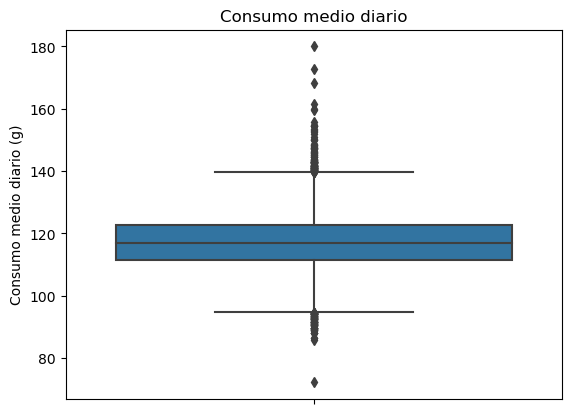

time: 312 ms (started: 2023-08-02 19:16:55 -03:00)


In [26]:
#Gráfico 10
ax=sns.boxplot(data=dfm, y='Consumo medio diario (g)') 
ax.set(title='Consumo medio diario');

Se observa una gran cantidad de valores outliers para la variable consumo por lo que eliminarán del subset generado para el análisis.

## Ingeniería de factores

Se eliminarán los valores outliers cuyos valores estén por encima y debajo de los cuartiles +-1.5 desvíos estándar.

In [27]:
# Se eliminan las filas cuyos valores están por encima y debajo de los cuartiles + 1.5 desvíos.
from scipy import stats


Q1 = dfm['Consumo medio diario (g)'].quantile(q=.25)
Q3 = dfm['Consumo medio diario (g)'].quantile(q=.75)
IQR = Q3-Q1


dfm = dfm[~((dfm['Consumo medio diario (g)'] < (Q1-1.5*IQR)) | (dfm['Consumo medio diario (g)'] > (Q3+1.5*IQR)))]


dfm.shape


(14637, 15)

time: 16 ms (started: 2023-08-02 19:16:56 -03:00)


Se eliminan 207 filas que contenían valores fuera del rango seleccionado.

Se calculan los valores límites de los cuartiles 1 y 3 y el rango intercuartil.

In [28]:
Q1

111.35981481481481

time: 15 ms (started: 2023-08-02 19:16:56 -03:00)


In [29]:
Q3

122.62942687228211

time: 16 ms (started: 2023-08-02 19:16:56 -03:00)


In [30]:
IQR

11.269612057467299

time: 15 ms (started: 2023-08-02 19:16:56 -03:00)


In [31]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 15963
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Días de receso corregido  14637 non-null  int64  
 1   granja                    14637 non-null  int64  
 2   Cantid. BB                14637 non-null  int64  
 3   % a 7 Días                14637 non-null  float64
 4   % Mortan.                 14637 non-null  float64
 5   Edad                      14637 non-null  float64
 6   mes levante               14637 non-null  int64  
 7   Consumo medio diario (g)  14637 non-null  float64
 8   Estación del año          14637 non-null  object 
 9   Densidad                  14637 non-null  float64
 10  Ventilación forzada       14637 non-null  object 
 11  Ambiente controlado       14637 non-null  object 
 12  localidad                 14637 non-null  object 
 13  zona climática            14637 non-null  object 
 14  zona prod  

Quedan 14637 filas con valores no nulos para analizar.

### Tabla descriptiva de datos 

In [32]:
dfm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Días de receso corregido,14637.0,22.69,5.68,3.00,18.00,22.00,29.00,30.00
granja,14637.0,1655.92,1005.66,10.00,691.00,1740.00,2684.00,2965.00
Cantid. BB,14637.0,50999.59,48305.95,1575.00,19800.00,36400.00,64000.00,387500.00
% a 7 Días,14637.0,1.59,1.11,0.00,0.94,1.34,1.93,36.26
% Mortan.,14637.0,8.28,5.13,0.00,4.86,6.94,10.14,57.21
Edad,14637.0,48.44,3.10,33.00,46.50,48.30,50.40,62.00
mes levante,14637.0,6.30,3.47,1.00,3.00,6.00,9.00,12.00
Consumo medio diario (g),14637.0,116.96,8.25,94.62,111.42,116.80,122.53,139.51
Densidad,14637.0,11.37,1.31,4.38,10.55,11.06,12.00,17.20


time: 94 ms (started: 2023-08-02 19:16:56 -03:00)


En la tabla se observa que los días de receso corregidos (días de intervalo entre crianzas, corregido significa que todo valor mayor a 30 se considera 30 días) son en promedio 22.69. La columna granja representa la cantidad de crianzas presentes en la tabla de datos. La cantidad de aves ingresadas (Cant.BB) es en promedio de aproximadamente 51000 por granja con un mínimo de 1575 y un máximo de 387500, el desvío de 48305 aves muestra una alta dispersión en la cantidad de aves que ingresan en las distintas granjas. Los valores de mortalidad a los 7 días y mortalidad final, si bien tienen valores extremos (36 % y 57 %), no tienen grandes desvíos y son en promedio 1.59 y 8.28 respectivamente.
En cuanto a la edad, el consumo de alimento y la densidad los valores promedio y de mediana son similares mostrando una distribución simétrica de los valores.

# Encoding

## Transformaciones categóricas

Las variables categóricas de la tabla dfm se transformaron utilizando OneHotEncoder para poder aplicar los modelos. Por cada variable diferente de cada columna se generó un array y los nombres para las futuras columnas a crear.

In [33]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Estación del año'].values.reshape(-1, 1)).toarray()
encoder.categories_

encoder2 = OneHotEncoder()
data2 = encoder2.fit_transform(dfm['Ambiente controlado'].values.reshape(-1, 1)).toarray()
encoder2.categories_

encoder3 = OneHotEncoder()
data3 = encoder3.fit_transform(dfm['localidad'].values.reshape(-1, 1)).toarray()
encoder3.categories_

encoder4 = OneHotEncoder()
data4 = encoder4.fit_transform(dfm['zona climática'].values.reshape(-1, 1)).toarray()
encoder4.categories_

encoder5 = OneHotEncoder()
data5 = encoder5.fit_transform(dfm['zona prod'].values.reshape(-1, 1)).toarray()
encoder5.categories_

encoder6 = OneHotEncoder()
data6 = encoder6.fit_transform(dfm['Ventilación forzada'].values.reshape(-1, 1)).toarray()
encoder6.categories_

[array(['MI', 'N', 'S'], dtype=object)]

time: 109 ms (started: 2023-08-02 19:16:56 -03:00)


Se convierten los arrays generados en dataframes 

In [34]:
data=pd.DataFrame(data, columns=encoder.categories_[0],index=dfm.index)
data2=pd.DataFrame(data2, columns=encoder2.categories_[0],index=dfm.index)
data3=pd.DataFrame(data3, columns=encoder3.categories_[0],index=dfm.index)
data4=pd.DataFrame(data4, columns=encoder4.categories_[0],index=dfm.index)
data5=pd.DataFrame(data5, columns=encoder5.categories_[0],index=dfm.index)
data6=pd.DataFrame(data6, columns=encoder6.categories_[0],index=dfm.index)


time: 15 ms (started: 2023-08-02 19:16:56 -03:00)


Se eliminan las columnas de la tabla dfm inicial

In [35]:
dfm=dfm.drop(['Estación del año','Ambiente controlado','localidad','zona climática','zona prod','Ventilación forzada'], axis=1)

time: 16 ms (started: 2023-08-02 19:16:56 -03:00)


Se unen los dataframe generados a la tabla 

In [36]:
dfm = pd.concat([dfm,data,data2,data3,data4,data5,data6], axis=1)


time: 16 ms (started: 2023-08-02 19:16:56 -03:00)


Antes de ejecutar los modelos se verificó que no se hayan generado columnas con valores nulos y que se hayan mantenido el total de filas del subset.

In [37]:
dfm.shape

(14637, 67)

time: 15 ms (started: 2023-08-02 19:16:56 -03:00)


In [38]:
dfm.isna().sum()

Días de receso corregido    0
granja                      0
Cantid. BB                  0
% a 7 Días                  0
% Mortan.                   0
                           ..
CR                          0
ER                          0
MI                          0
N                           0
S                           0
Length: 67, dtype: int64

time: 15 ms (started: 2023-08-02 19:16:56 -03:00)


In [39]:
columns_names = dfm.columns.values
columns_names

array(['Días de receso corregido', 'granja', 'Cantid. BB', '% a 7 Días',
       '% Mortan.', 'Edad', 'mes levante', 'Consumo medio diario (g)',
       'Densidad', 'invierno', 'otoño', 'primavera', 'verano', 'no', 'si',
       ' Aldea San Antonio', 'Aldea Asunción', 'Arrecifes', 'Basavilbaso',
       'Bragado', 'Capitán Sarmiento', 'Carbó', 'Carmen de Areco',
       'Cañuelas', 'Chivilcoy', 'Colonia Elía', 'Colón BA', 'Colón ER',
       'Concepción del Uruguay', 'Crespo', 'Escobar', 'Galarza',
       'General Alvear', 'General Belgrano', 'Gualeguay', 'Gualeguaychú',
       'Herrera', 'Larroque', 'Las Flores', 'Lazo', 'Lucas González',
       'Mansilla', 'Mercedes', 'Norberto de la Riestra',
       'Puerta de Crespo', 'Rocamora', 'Roque Pérez', 'Rosario del Tala',
       'Salto', 'San Antonio de Areco', 'San Pedro', 'Santa Anita',
       'Santa Lucía', 'Urdinarrain', 'Villa Elisa', 'Villaguay',
       '25 de mayo', 'Arrecifes_BA', 'C. del Uruguay', 'Crespo_ER',
       'otra ER', 'BA', 'C

time: 16 ms (started: 2023-08-02 19:16:56 -03:00)


In [40]:
duplicate_columns = dfm.columns[dfm.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

time: 0 ns (started: 2023-08-02 19:16:56 -03:00)


# Modelado

# Modelos de regresión

## Generación de datos de entrenamiento y prueba

Se generó la variable dependiente X3 con los valores de Consumo medio diario de alimento y la variable y3 con el resto de las variables independientes presentes en el subset dfm. Los datos se dividen en grupos de entrenamiento y prueba (30 % de los datos para prueba).

In [41]:

X3=dfm.drop('Consumo medio diario (g)', axis=1) 

y3=dfm['Consumo medio diario (g)']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

time: 32 ms (started: 2023-08-02 19:16:56 -03:00)


## Aplicación de modelos y generación de métricas

## Linear regression

In [42]:
model = LinearRegression(fit_intercept=True)
model.fit(X3_train, y3_train)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)

lr_test_mse = mean_squared_error(y3_test, y3_test_pred)
lr_train_mse = mean_squared_error(y3_train, y3_train_pred)

lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
lr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

lr_test_r2 = r2_score(y3_test, y3_test_pred)
lr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 109 ms (started: 2023-08-02 19:16:56 -03:00)


## KNN


In [43]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X3_train, y3_train)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)



knr_test_mse = mean_squared_error(y3_test, y3_test_pred)
knr_train_mse = mean_squared_error(y3_train, y3_train_pred)

knr_test_rmse = np.sqrt(knr_test_mse)
knr_train_rmse = np.sqrt(knr_train_mse)

knr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
knr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

knr_test_r2 = r2_score(y3_test, y3_test_pred)
knr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 6.27 s (started: 2023-08-02 19:16:57 -03:00)


## Random forest regression

In [44]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X3_train, y3_train)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


rfr_test_mse = mean_squared_error(y3_train, y3_train_pred)
rfr_train_mse = mean_squared_error(y3_test, y3_test_pred)

rfr_test_rmse = np.sqrt(rfr_test_mse)
rfr_train_rmse = np.sqrt(rfr_train_mse)

rfr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
rfr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

rfr_test_r2 = r2_score(y3_test, y3_test_pred)
rfr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 4.58 s (started: 2023-08-02 19:17:03 -03:00)


## Xgboost

In [45]:
model = xgb.XGBRegressor(n_estimators=50, random_state=42)
model.fit(X3_train, y3_train)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


xgb_test_mse = mean_squared_error(y3_train, y3_train_pred)
xgb_train_mse = mean_squared_error(y3_test, y3_test_pred)

xgb_test_rmse = np.sqrt(xgb_test_mse)
xgb_train_rmse = np.sqrt(xgb_train_mse)

xgb_test_mae = mean_absolute_error(y3_test, y3_test_pred)
xgb_train_mae = mean_absolute_error(y3_train, y3_train_pred)

xgb_test_r2 = r2_score(y3_test, y3_test_pred)
xgb_train_r2 = r2_score(y3_train, y3_train_pred)

time: 1.08 s (started: 2023-08-02 19:17:08 -03:00)


Se convirtieron las métricas obtenidas para cada modelo en un dataframe para los datos de prueba y otro para los datos de entrenamiento y así generar tablas que faciliten la comparación.

In [46]:
#Datos de prueba

dfr=pd.DataFrame()
dfr['Linear']=None
dfr['KNN']=None
dfr['RF']=None
dfr['XGB']=None

dfr.loc['MSE'] = [lr_test_mse, knr_test_mse, rfr_test_mse,xgb_test_mse]
dfr.loc['RMSE'] = [lr_test_rmse, knr_test_rmse, rfr_test_rmse,xgb_test_rmse]
dfr.loc['MAE'] = [lr_test_mae, knr_test_mae, rfr_test_mae,xgb_test_mae]
dfr.loc['R2'] = [lr_test_r2, knr_test_r2, rfr_test_r2,xgb_test_r2]



time: 16 ms (started: 2023-08-02 19:17:09 -03:00)


In [47]:
#Datos de entrenamiento

dfr2=pd.DataFrame()
dfr2['Linear']=None
dfr2['KNN']=None
dfr2['RF']=None
dfr2['XGB']=None


dfr2.loc['MSE'] = [lr_train_mse, knr_train_mse, rfr_train_mse,xgb_train_mse]
dfr2.loc['RMSE'] = [lr_train_rmse, knr_train_rmse, rfr_train_rmse,xgb_train_rmse]
dfr2.loc['MAE'] = [lr_train_mae, knr_train_mae, rfr_train_mae,xgb_train_mae]
dfr2.loc['R2'] = [lr_train_r2, knr_train_r2, rfr_train_r2,xgb_train_r2]


time: 16 ms (started: 2023-08-02 19:17:09 -03:00)


## Métricas de los modelos para los datos de prueba

In [48]:
dfr

,Linear,KNN,RF,XGB
MSE,53.804870,66.918594,7.023978,27.674852
RMSE,7.335180,8.180379,2.650279,5.260689
MAE,5.851015,6.534926,5.565749,5.355724
R2,0.203687,0.009604,0.275333,0.322296


time: 47 ms (started: 2023-08-02 19:17:09 -03:00)


## Métricas de los modelos para los datos de entrenamiento

In [49]:
dfr2

,Linear,KNN,RF,XGB
MSE,52.891295,55.158675,48.963937,45.790739
RMSE,7.272640,7.426889,6.997424,6.766885
MAE,5.762394,5.915653,2.057122,4.127042
R2,0.226206,0.193035,0.897240,0.595120


time: 31 ms (started: 2023-08-02 19:17:09 -03:00)


Comparando las métricas MSE, RMSE, MAE y R2 de los 4 modelos los mejores valores son para Random Forest en primer lugar y XGB en segundo lugar.

# Validación del modelo

## Stratified-K fold para Random Forest Regressor

Se aplica cross validation score para probar el modelo de Random Forest Regressor

In [50]:
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
scores = cross_val_score(model, X3_train, y3_train, cv=7, verbose=1,scoring='neg_mean_absolute_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


time: 1.66 s (started: 2023-08-02 19:17:09 -03:00)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished


In [51]:
scores

array([-5.90380813, -6.23930999, -5.9131547 , -5.92677953, -5.92431458,
       -6.0307267 , -6.06706368])

time: 62 ms (started: 2023-08-02 19:17:11 -03:00)


Realizando una prueba de cross validation para el modelo de RandomForestRegressor se observa que el modelo es estable ya que al variar la conformación del grupo de datos de entrenamiento los valores de negative MAE obtenidos son similares.

In [52]:
model.fit(X3_train,y3_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

time: 328 ms (started: 2023-08-02 19:17:11 -03:00)


Se obtienen los coeficientes de cada variable independiente analizada en el modelo para detectar cuáles tienen mayor impacto en el consumo de alimento.

In [53]:
#  importancia de las características y los nombres de las variables independientes
importancia_caracteristicas = model.feature_importances_
nombres_variables = ['Días de receso corregido', 'granja', 'Cantid. BB', '% a 7 Días',
       '% Mortan.', 'Edad', 'mes levante',
       'Densidad', 'invierno', 'otoño', 'primavera', 'verano', 'no', 'si',
       ' Aldea San Antonio', 'Aldea Asunción', 'Arrecifes', 'Basavilbaso',
       'Bragado', 'Capitán Sarmiento', 'Carbó', 'Carmen de Areco',
       'Cañuelas', 'Chivilcoy', 'Colonia Elía', 'Colón BA', 'Colón ER',
       'Concepción del Uruguay', 'Crespo', 'Escobar', 'Galarza',
       'General Alvear', 'General Belgrano', 'Gualeguay', 'Gualeguaychú',
       'Herrera', 'Larroque', 'Las Flores', 'Lazo', 'Lucas González',
       'Mansilla', 'Mercedes', 'Norberto de la Riestra',
       'Puerta de Crespo', 'Rocamora', 'Roque Pérez', 'Rosario del Tala',
       'Salto', 'San Antonio de Areco', 'San Pedro', 'Santa Anita',
       'Santa Lucía', 'Urdinarrain', 'Villa Elisa', 'Villaguay',
       '25 de mayo', 'Arrecifes_BA', 'C. del Uruguay', 'Crespo_ER',
       'otra ER', 'BA', 'CR', 'ER', 'MI', 'N', 'S']

#  DataFrame
df_importancia = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancia_caracteristicas})



time: 16 ms (started: 2023-08-02 19:17:11 -03:00)


Se ordenan los resultados de mayor a menor y se obtienen los 10 primeros valores.

In [54]:
df_importancia_ordenado = df_importancia.sort_values(by='Importancia', ascending=False)


time: 0 ns (started: 2023-08-02 19:17:11 -03:00)


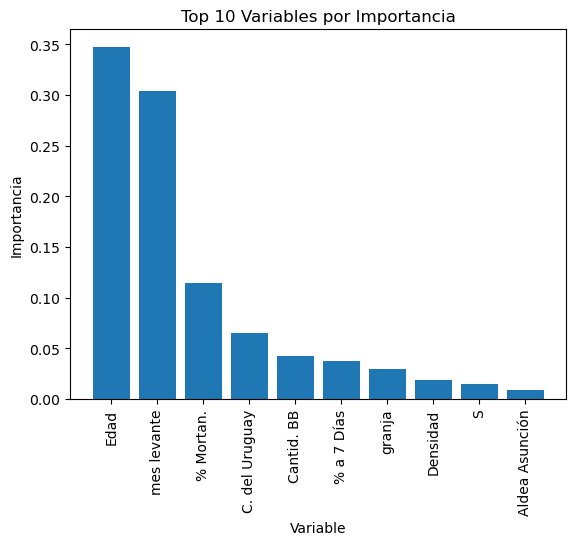

time: 266 ms (started: 2023-08-02 19:17:11 -03:00)


In [55]:
# Gráfico 11
# Obtiene los 10 primeros valores
df_importancia_top10 = df_importancia_ordenado.head(10)

# Grafica los 10 primeros valores
plt.bar(df_importancia_top10['Variable'], df_importancia_top10['Importancia'])
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Top 10 Variables por Importancia')
plt.xticks(rotation=90)
plt.show()

En el gráfico se observa que la edad, el mes de levante y la mortandad son las variables que tienen mayor impacto en el modelo de predicción del consumo de alimento.

# Modelos de clasificación

## Preparación de los datos

Para los modelos de clasificación se crea un nuevo subset **dfc** para detectar si existen relaciones entre la ganancia media diaria de peso y variables independientes relacionadas con la ubicación geográfica, la época del año, el tipo de granja y condiciones de manejo representadas por las columnas: días de receso corregido, % a 7 días (mortalidad) y densidad (cantidad de aves/m2 de galpón).

In [56]:
#Creación del subset para los modelos de clasificación

dfc=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','mes ingreso','Estación del año','Densidad','Ventilación forzada','Ambiente controlado','localidad','zona climática','zona prod' ]]
dfc.head()

,Distancia a planta alimento,Días de receso corregido,A.D.,% a 7 Días,mes ingreso,Estación del año,Densidad,Ventilación forzada,Ambiente controlado,localidad,zona climática,zona prod
0,88.0,14,54.49,0.55,11,verano,12.000000,S,no,San Pedro,Arrecifes_BA,BA
1,75.0,12,50.63,0.83,11,verano,10.454545,N,no,Salto,Arrecifes_BA,BA
2,110.0,11,56.12,0.92,11,verano,9.470000,N,no,Chivilcoy,25 de mayo,BA
3,74.0,9,56.12,1.35,11,verano,10.000000,N,no,San Pedro,Arrecifes_BA,BA
4,29.0,10,60.98,0.76,11,verano,10.769231,N,no,Arrecifes,Arrecifes_BA,BA


time: 47 ms (started: 2023-08-02 19:17:11 -03:00)


## Creación de variables

Se crea una nueva variable "Ganancia" para agrupar los valores de ganancia media diaria de peso en tres categorías: "Buena", "Regular" y "Mala". Para ello se dividió el rango de valores en tres partes iguales.

Se calcula la distancia entre los rangos de valores y se obtienen el mínimo y el máximo.

In [57]:
max= dfc['A.D.'].max()
max
min=dfc['A.D.'].min()
min
(max-min)/3

15.75666666666667

time: 16 ms (started: 2023-08-02 19:17:11 -03:00)


In [58]:
max

85.43

time: 0 ns (started: 2023-08-02 19:17:11 -03:00)


In [59]:
min

38.16

time: 0 ns (started: 2023-08-02 19:17:11 -03:00)


Se crea una nueva columna para clasificar las granjas según su valor de ganancia de peso

In [60]:
#Para generar los grupos se utilizan los valores de distancia, mínimo y máximo calculados

conditionlist = [
    (dfc['A.D.'] >= 69.67) ,
    (dfc['A.D.'] >= 53.91) & (df['A.D.'] <69.67),
    (dfc['A.D.'] < 53.91)]
choicelist = ['Buena', 'Regular', 'Mala']
dfc['Ganancia'] = np.select(conditionlist, choicelist, default='Not Specified')

time: 0 ns (started: 2023-08-02 19:17:11 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_10868\1027081284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Ganancia'] = np.select(conditionlist, choicelist, default='Not Specified')


Se elimina la columna A.D. (ganancia) del subset dfc.

In [61]:
dfc=dfc.drop(['A.D.'], axis=1)

time: 15 ms (started: 2023-08-02 19:17:12 -03:00)


In [62]:
dfc.head()

,Distancia a planta alimento,Días de receso corregido,% a 7 Días,mes ingreso,Estación del año,Densidad,Ventilación forzada,Ambiente controlado,localidad,zona climática,zona prod,Ganancia
0,88.0,14,0.55,11,verano,12.000000,S,no,San Pedro,Arrecifes_BA,BA,Regular
1,75.0,12,0.83,11,verano,10.454545,N,no,Salto,Arrecifes_BA,BA,Mala
2,110.0,11,0.92,11,verano,9.470000,N,no,Chivilcoy,25 de mayo,BA,Regular
3,74.0,9,1.35,11,verano,10.000000,N,no,San Pedro,Arrecifes_BA,BA,Regular
4,29.0,10,0.76,11,verano,10.769231,N,no,Arrecifes,Arrecifes_BA,BA,Regular


time: 31 ms (started: 2023-08-02 19:17:12 -03:00)


Ahora en lugar de los valores individuales de ganancia de peso se observa la categoría generada.

Se detectan y eliminan valores nulos del subset para poder aplicar los modelos de clasificación.

In [63]:
dfc.isna().sum()

Distancia a planta alimento    311
Días de receso corregido         0
% a 7 Días                       0
mes ingreso                      0
Estación del año                 0
Densidad                         0
Ventilación forzada              0
Ambiente controlado              0
localidad                        0
zona climática                   0
zona prod                        0
Ganancia                         0
dtype: int64

time: 15 ms (started: 2023-08-02 19:17:12 -03:00)


In [64]:
dfc=dfc.dropna()

time: 0 ns (started: 2023-08-02 19:17:12 -03:00)


In [65]:
dfc.isna().sum()

Distancia a planta alimento    0
Días de receso corregido       0
% a 7 Días                     0
mes ingreso                    0
Estación del año               0
Densidad                       0
Ventilación forzada            0
Ambiente controlado            0
localidad                      0
zona climática                 0
zona prod                      0
Ganancia                       0
dtype: int64

time: 16 ms (started: 2023-08-02 19:17:12 -03:00)


In [66]:
dfc.shape

(14533, 12)

time: 16 ms (started: 2023-08-02 19:17:12 -03:00)


Luego de eliminar los valores nulos la tabla queda con 14533 filas (crianzas) para analizar.

### Histograma de ganancia

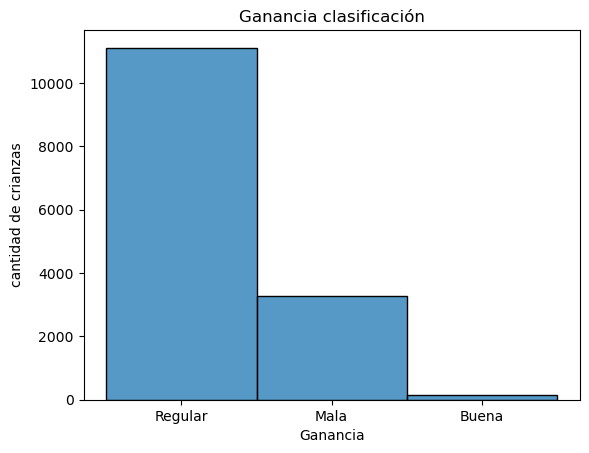

time: 297 ms (started: 2023-08-02 19:17:12 -03:00)


In [67]:
#Gráfico 12
#Histograma de Ganancia#
ax=sns.histplot(data=dfc, x='Ganancia')
ax.set(title='Ganancia clasificación', ylabel='cantidad de crianzas');

La cantidad de valores de cada categoría muestra que su distribución está desbalanceada. Más adelante se realizará un oversampling de los datos.

## Encoding

Para el caso de los modelos de clasificación se utilizó LabelEncoder ya que es más apropiado para este análisis mantener las variables categóricas en sus grupos originales y no desagregarlas.

In [68]:
label_encoder = preprocessing.LabelEncoder()
dfc['Estación del año']= label_encoder.fit_transform(dfc['Estación del año'])
dfc['Estación del año'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['Ambiente controlado']= label_encoder.fit_transform(dfc['Ambiente controlado'])
dfc['Ambiente controlado'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['localidad']= label_encoder.fit_transform(dfc['localidad'])
dfc['localidad'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['zona climática']= label_encoder.fit_transform(dfc['zona climática'])
dfc['zona climática'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['zona prod']= label_encoder.fit_transform(dfc['zona prod'])
dfc['zona prod'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['Ventilación forzada']= label_encoder.fit_transform(dfc['Ventilación forzada'])
dfc['Ventilación forzada'].unique()


label_encoder = preprocessing.LabelEncoder()
dfc['Ganancia']= label_encoder.fit_transform(dfc['Ganancia'])
dfc['Ganancia'].unique()



array([2, 1, 0])

time: 63 ms (started: 2023-08-02 19:17:12 -03:00)


## Mapa de calor de correlaciones

Se genera un mapa de correlaciones para realizar un análisis preliminar de los datos y detectar si hay variables altamente correlacionadas con la ganancia de peso para descartarlas previo a la aplicación de los modelos.

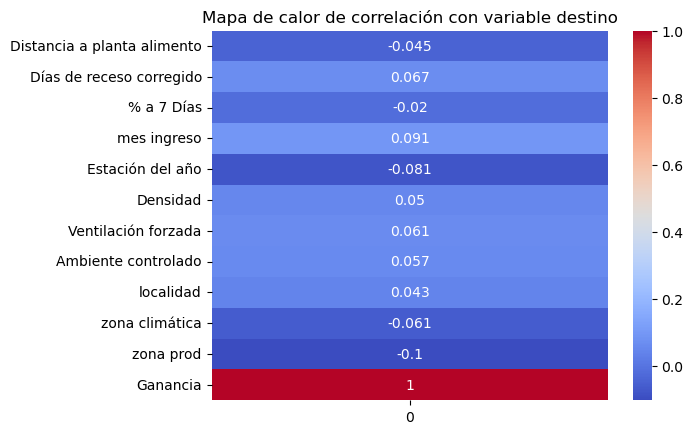

time: 312 ms (started: 2023-08-02 19:17:12 -03:00)


In [69]:
#Gráfico 13
corr = dfc.corr('pearson')
target_corr = corr['Ganancia'].values.reshape(-1,1)

sns.heatmap(target_corr, annot=True, yticklabels= dfc.columns, cmap='coolwarm')
plt.title('Mapa de calor de correlación con variable destino')
plt.show()

Las correlaciones en general son muy bajas, las mayores se dan con las variables zona de producción y mes de ingreso.

## Selección de variables predictoras y destino

Se define a la columna «Ganancia» como variable destino y al resto de las variables como variables x predictoras.

In [70]:
# Seleccionar las variables predictoras y la variable de destino
X=dfc.drop('Ganancia', axis=1)
y=dfc['Ganancia']


time: 0 ns (started: 2023-08-02 19:17:13 -03:00)


## Oversampling

Se genera oversampling para equilibrar la cantidad de valores de cada variable destino.

In [71]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(0, 11109), (1, 11109), (2, 11109)]
time: 78 ms (started: 2023-08-02 19:17:13 -03:00)


## Generación de datos de entrenamiento y prueba

Una vez balanceados los valores se dividen en grupos de entrenamiento y prueba (30 % para la prueba).

In [72]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

time: 16 ms (started: 2023-08-02 19:17:13 -03:00)


## Aplicación de los modelos y generación de métricas

## RandomForestClassifier *4 niveles*


In [73]:
# modelo clasificación 1
clf1 = RandomForestClassifier(max_depth=4, random_state=42)
clf1.fit(X_train, y_train)

#  predicciones
y_pred= clf1.predict(X_test)

time: 1.33 s (started: 2023-08-02 19:17:13 -03:00)


### Métricas RFC 4

In [74]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77      3255
           1       0.62      0.76      0.68      3386
           2       0.60      0.28      0.38      3358

    accuracy                           0.64      9999
   macro avg       0.63      0.64      0.61      9999
weighted avg       0.63      0.64      0.61      9999

time: 31 ms (started: 2023-08-02 19:17:14 -03:00)


## RandomForestClassifier *7 niveles*


In [75]:
#modelo clasif 2
clf2 = RandomForestClassifier(max_depth=7, random_state=42)
clf2.fit(X_train, y_train)
#predicciones
y_pred= clf2.predict(X_test)

time: 1.3 s (started: 2023-08-02 19:17:14 -03:00)


### Métricas RFC 7

In [76]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      3255
           1       0.69      0.75      0.72      3386
           2       0.68      0.51      0.58      3358

    accuracy                           0.74      9999
   macro avg       0.73      0.74      0.73      9999
weighted avg       0.73      0.74      0.73      9999

time: 31 ms (started: 2023-08-02 19:17:15 -03:00)


## Balanced RandomForest Classifier

In [77]:
# Definición del clasificador balanced random forest classifier

brfc = BalancedRandomForestClassifier(n_estimators=1000,max_depth=2,random_state=42)
#modelo clasif 3
brfc.fit(X_train,y_train)
# Predicciones
y_pred = brfc.predict(X_test)



time: 0 ns (started: 2023-08-02 19:17:15 -03:00)


### Métricas BRFC

In [79]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      3255
           1       0.59      0.69      0.63      3386
           2       0.46      0.22      0.29      3358

    accuracy                           0.56      9999
   macro avg       0.54      0.56      0.52      9999
weighted avg       0.54      0.56      0.52      9999

time: 31 ms (started: 2023-08-02 19:17:32 -03:00)


## KNN Classifier

In [80]:
# Crea el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
# modelo clasif 4
knn.fit(X_train, y_train)
# predicciones
y_pred = knn.predict(X_test)

time: 0 ns (started: 2023-08-02 19:17:32 -03:00)


### Métricas KNNC

In [82]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3255
           1       0.75      0.86      0.80      3386
           2       0.83      0.67      0.74      3358

    accuracy                           0.84      9999
   macro avg       0.85      0.84      0.84      9999
weighted avg       0.85      0.84      0.84      9999

time: 62 ms (started: 2023-08-02 19:17:33 -03:00)


Las métricas de los modelos aplicados fueron mejores para KNNC en primer lugar y para RandomForestClasiffier con 7 niveles en segundo lugar. En el caso de KNNC el valor de F1-score es cercano a 1 para el caso de la variable 0 (Ganancia Buena) dando indicios de overfitting, posiblemente debido al oversampling realizado. A continuación se repetirá el modelo KNNC en los datos originales (sin oversampling) luego de aplicar una reducción de la dimensionalidad con PCA. 

### Generación de datos de entrenamiento y prueba

In [83]:
# Seleccionar las variables predictoras y la variable de destino
X1=dfc.drop('Ganancia', axis=1)
y1=dfc['Ganancia']

time: 0 ns (started: 2023-08-02 19:17:33 -03:00)


In [84]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3, random_state=42)

time: 15 ms (started: 2023-08-02 19:17:33 -03:00)


## PCA

Se aplicó PCA para detectar si es posible reducir la cantidad de variables a analizar transformándolas en componentes.

In [85]:
pca = PCA(n_components=10) # se eligen todas las variables originales
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:7])) # se elige visualizar 7 componentes


shape of X_pca (10173, 10)
[9.62770940e-01 2.57908381e-02 7.45926465e-03 2.83670807e-03
 4.12590081e-04 2.77693914e-04 2.33868005e-04 1.80091835e-04
 2.80223020e-05 6.25358651e-06]
suma: 0.9997819024927462
time: 62 ms (started: 2023-08-02 19:17:33 -03:00)


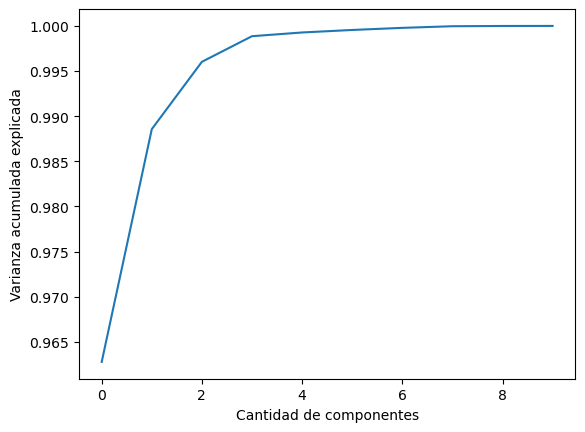

time: 360 ms (started: 2023-08-02 19:17:33 -03:00)


In [86]:
#Gráfico 14
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()



Se observa que reduciendo las variables en dos componentes es posible explicar el 99% de la varianza de los datos originales.

Se seleccionan 2 componentes para aplicar el modelo de KNNC

In [87]:
pca = PCA(n_components=2) # se seleccionan 2 componentes
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

time: 78 ms (started: 2023-08-02 19:17:34 -03:00)


In [88]:
knn = KNeighborsClassifier()
knn.fit(X_pca, y_train)
y_pca_pred = knn.predict(X_test_pca)


c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


time: 344 ms (started: 2023-08-02 19:17:34 -03:00)


### Métricas KKNC con PCA

In [89]:
print(classification_report(y_pred=y_pca_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.22      0.04      0.06        54
           1       0.37      0.27      0.32       967
           2       0.79      0.86      0.83      3339

    accuracy                           0.72      4360
   macro avg       0.46      0.39      0.40      4360
weighted avg       0.69      0.72      0.70      4360

time: 16 ms (started: 2023-08-02 19:17:34 -03:00)


De las métricas obtenidas es posible asumir que una reducción de la dimensionalidad no mejora el modelo de KNNC aplicado cuando no se realiza oversampling ya que no solo el valor de accuracy es menor (72 %) si no que el valor de F1 para la variable 0 se reduce a 0.06. 

A continuación se utilizará GridSearchCV para hacer una prueba de validación cruzada para calcular cuáles son los mejores hiperparámetros para el modelo de KNNC.

## GridSearchCV

Se definen los parámetros para analizar los datos de entrenamiento y prueba del subset dfc.

In [90]:
# se definen los parámetros
param_grid = {
    'n_neighbors': list(range(5, 30)), # rango de valores de vecinos
    'weights': ['uniform', 'distance'], # distribución
    'p': list(range(1, 11)) # distancia
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



time: 3min 1s (started: 2023-08-02 19:17:34 -03:00)


In [91]:
print("Mejores hiperparámetros:", best_params)
print("Precisión del modelo:", accuracy)

Mejores hiperparámetros: {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Precisión del modelo: 0.7839449541284403
time: 0 ns (started: 2023-08-02 19:20:35 -03:00)


Del modelo surge que los mejores hiperparámetros son neighbors= 18  y p = 1 para el modelo KNNC y se obtiene una accuracy del 78 %.

## KNNC con nuevos hiperparámetros

In [92]:
# Crea el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=18)

time: 15 ms (started: 2023-08-02 19:20:35 -03:00)


In [93]:
# Entrena el clasificador
knn.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


time: 610 ms (started: 2023-08-02 19:20:35 -03:00)


## Métricas KNNC 18

In [94]:
print(classification_report(y_pred=y_pred,y_true=y_test, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        54
           1       0.56      0.21      0.31       967
           2       0.80      0.95      0.87      3339

    accuracy                           0.78      4360
   macro avg       0.79      0.39      0.39      4360
weighted avg       0.75      0.78      0.73      4360

time: 16 ms (started: 2023-08-02 19:20:36 -03:00)


Si bien el valor de accuracy general del modelo es aceptable, los valores de precisión y recall para la variable 0 son 1 y 0 por lo que, al igual que para el caso de PCA no es adecuado aplicar estos modelos sin realizar oversampling aun cuando se apliquen modelos de mejora como PCA y GridSearchCV.

# Boosting

Finalmente se aplicará un modelo de clasificación XGBoost a los datos del subset dfc.

## XGBoost Classifier

In [95]:
# Crear el clasificador XGBoost
xgb_clf = xgb.XGBClassifier()
# Entrena el clasificador
xgb_clf.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = xgb_clf.predict(X_test)

time: 2.45 s (started: 2023-08-02 19:20:36 -03:00)


### Métricas XGBC

In [96]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10        54
           1       0.58      0.37      0.45       967
           2       0.82      0.92      0.87      3339

    accuracy                           0.79      4360
   macro avg       0.64      0.45      0.47      4360
weighted avg       0.77      0.79      0.77      4360

time: 31 ms (started: 2023-08-02 19:20:38 -03:00)


Del análisis de los valores de la tabla se observa que el modelo tiene un valor de accuracy de 79 % y que los valores de F1 son aceptables para la variable 2 (regular) pero muy bajos para las variables 0 y 1 (buena y mala) de ganancia.

# Modelos de Agrupación

 El objetivo de aplicar modelos de agrupación es detectar si hay patrones de comportamiento similares teniendo en consideración las variables presentes, para ello se confeccionó un nuevo subset a partir de los datos de la tabla original: **dfa**.

In [150]:
#Creación del subset para los modelos de agrupación

dfa=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','Densidad','Consumo medio diario (g)' ]]
dfa.head()

,Distancia a planta alimento,Días de receso corregido,A.D.,% a 7 Días,Densidad,Consumo medio diario (g)
0,88.0,14,54.49,0.55,12.000000,115.963592
1,75.0,12,50.63,0.83,10.454545,117.081839
2,110.0,11,56.12,0.92,9.470000,127.820226
3,74.0,9,56.12,1.35,10.000000,127.343729
4,29.0,10,60.98,0.76,10.769231,138.304026


time: 15 ms (started: 2023-08-02 19:51:14 -03:00)


Las variables seleccionadas representan medidas de manejo por parte de los encargados de las granjas y las variables A.D. (ganancia de peso) y Consumo medio diario (de alimento) como variables de resultado productivo.

In [151]:
dfa.shape

(14844, 6)

time: 16 ms (started: 2023-08-02 19:51:17 -03:00)


In [152]:
dfa.isna().sum()

Distancia a planta alimento    311
Días de receso corregido         0
A.D.                             0
% a 7 Días                       0
Densidad                         0
Consumo medio diario (g)         0
dtype: int64

time: 0 ns (started: 2023-08-02 19:51:19 -03:00)


Se detectan que hay granjas que no poseen el dato de distancia a planta de alimento por lo que serán eliminadas de la tabla.

In [153]:
dfa=dfa.dropna()

time: 16 ms (started: 2023-08-02 19:51:21 -03:00)


In [154]:
dfa.isna().sum()

Distancia a planta alimento    0
Días de receso corregido       0
A.D.                           0
% a 7 Días                     0
Densidad                       0
Consumo medio diario (g)       0
dtype: int64

time: 16 ms (started: 2023-08-02 19:51:23 -03:00)


In [155]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14533 entries, 0 to 15963
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Distancia a planta alimento  14533 non-null  float64
 1   Días de receso corregido     14533 non-null  int64  
 2   A.D.                         14533 non-null  float64
 3   % a 7 Días                   14533 non-null  float64
 4   Densidad                     14533 non-null  float64
 5   Consumo medio diario (g)     14533 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 794.8 KB
time: 31 ms (started: 2023-08-02 19:51:26 -03:00)


Se verifica que la tabla no contenga valores nulos ni variables categóricas previo al análisis, quedan 14533 crianzas para analizar.

## Mapa de calor de correlación entre las variables

Text(0.5, 1.0, 'Mapa de calor de los coeficientes de correlación')

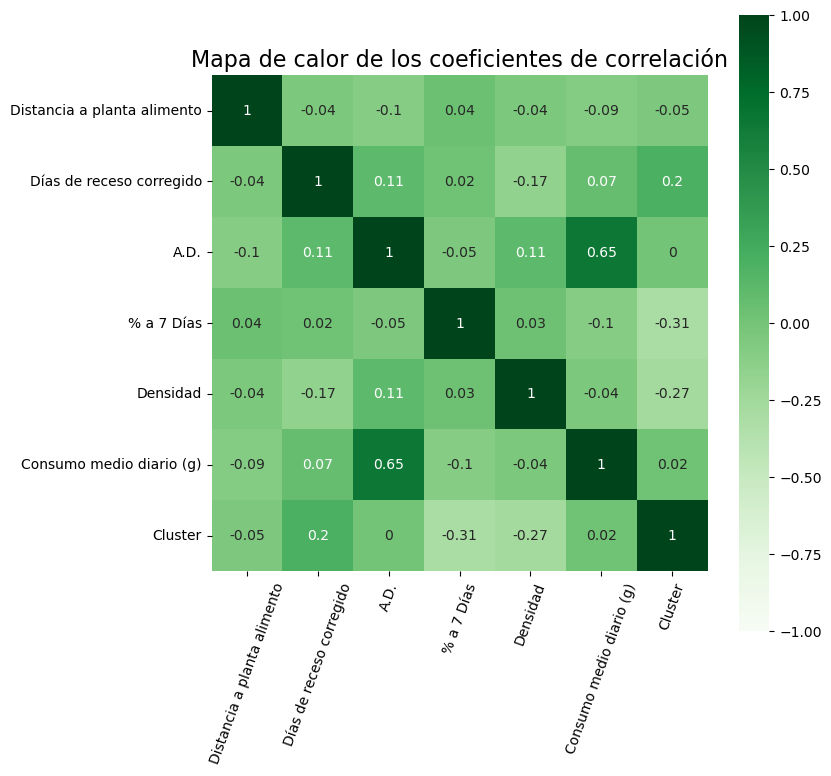

time: 547 ms (started: 2023-08-02 19:54:28 -03:00)


In [164]:
# Gráfico 15
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(dfa.corr().round(2), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot=True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)



En el gráfico se observa la correlación previamente detectada entre la ganancia media diaria de peso y el consumo de alimento.El objetivo de aplicar modelos de agrupación es detectar si hay patrones de comportamiento similares teniendo en consideración las variables presentes en el subset: 
Distancia a planta de alimento: Se relaciona con la ubicación geográfica de las granjas, las granjas más alejadas se encuentran en zonas con peores condiciones climáticas.
Días de receso corregido: Cantidad de días transcurridos entre crianzas, se relaciona con las condiciones de limpieza y desinfección de los galpones al ingreso de las aves.
% a 7 días: Mortalidad de animales durante la primera semana de vida, es una medida indirecta del manejo de los encargados de las granjas y de la calidad de los pollitos BB recibidos.
Densidad: Cantidad de animales por m2 de galpón, en general las granjas con mayores densidades son aquellas que poseen un sistema de ventilación forzada y/o son de ambiente controlado.

## DBSCAN

Se genera un modelo de BSCAN con el objetivo de detectar si es posible agrupar las crianzas y granjas en función de que compartan similares características de distancia, manejo y condiciones de granja y, a su vez, tengan similares resultados de ganancia de peso y consumo de alimento.

Se define la variable X a utilizar en el modelo.

In [157]:
X = dfa.values


time: 15 ms (started: 2023-08-02 19:51:38 -03:00)


Se normalizan los datos previo a la aplicación del modelo

In [158]:
# Escalamos los datos antes de aplicar el algoritmo para asegurar que todas las características tengan el mismo peso
scaler = StandardScaler()
X = scaler.fit_transform(X)

time: 0 ns (started: 2023-08-02 19:51:41 -03:00)


Se aplica el modelo BSCAN seleccionando aleatoreamente los valores eps= 0.75 y muestras mínimas= 40

In [159]:
dbscan = DBSCAN(eps=0.75, min_samples=40)
# min_samples: número mínimo de muestras necesarias para formar un clúster
# eps: la distancia máxima entre dos muestras para que se consideren vecinas
clusters = dbscan.fit_predict(X)

time: 1.06 s (started: 2023-08-02 19:51:45 -03:00)


Se añaden los clústers generados como una nueva columna en el subset dfa.

In [160]:
# Añade los resultados del clustering como una nueva columna al dataframe
dfa['Cluster'] = clusters

time: 0 ns (started: 2023-08-02 19:51:48 -03:00)


Se visualiza la cantidad de filas que contiene cada clúster generado.

In [161]:
# Imprime los clústeres obtenidos
print("Clústeres encontrados:")
print(dfa['Cluster'].value_counts())

Clústeres encontrados:
Cluster
 0    7506
-1    7027
Name: count, dtype: int64
time: 0 ns (started: 2023-08-02 19:51:56 -03:00)


Se genera un gráfico para visualizar los clústeres generados en función de las variables ganancia de peso y consumo de alimento.

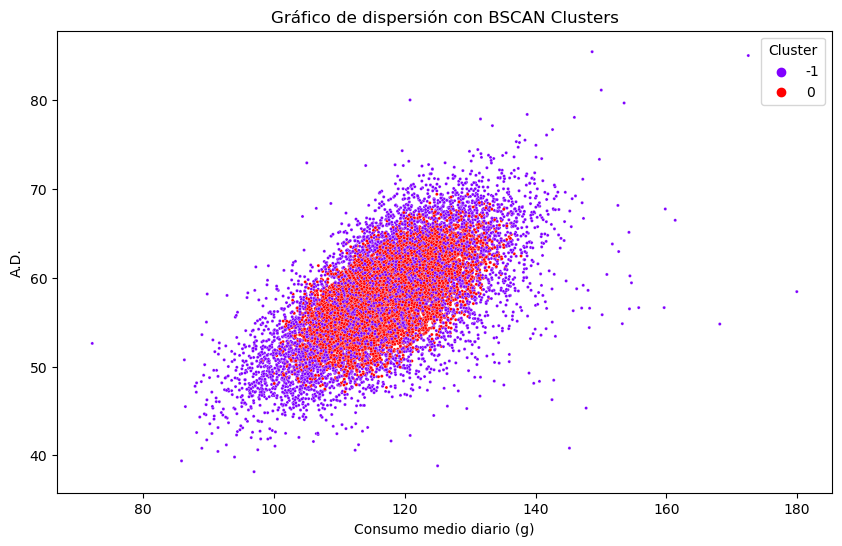

time: 734 ms (started: 2023-08-02 19:54:35 -03:00)


In [165]:
#Gráfico 16
column_y = dfa['A.D.']
column_x = dfa['Consumo medio diario (g)']

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfa, x=column_x, y=column_y, hue='Cluster', palette='rainbow', s=5)
plt.title('Gráfico de dispersión con BSCAN Clusters')
plt.legend(title='Cluster', loc='best')
plt.show();

Se observa que los clúster se encuentran superpuestos y que uno parecería contener al otro. Debido a ello se buscará mejorar los hiperparámetros del modelo.

### Iteración para hallar mejores hiperparámetros para el modelo DBSCAN

Se define una lista de posibles valores para eps y min_samples

In [166]:
# Define una lista de posibles valores para eps y min_samples
eps_values = [0.5, 0.75, 1, 1.25]
min_samples_values = [20, 40, 60, 80]

best_eps = eps_values[0]
best_min_samples = min_samples_values[0]
best_silhouette = float('-inf')  # Inicializar con un valor muy bajo

# Itera sobre todos los valores de los hiperparámetros
for eps in eps_values:
    for min_samples in min_samples_values:
        # Crear el objeto DBSCAN con los hiperparámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Aplica DBSCAN al conjunto de datos
        clusters = dbscan.fit_predict(X)

        # Verifica si se ha encontrado una mejor combinación de hiperparámetros
        if len(np.unique(clusters)) > 1:
            silhouette = silhouette_score(X, clusters)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Crea un nuevo objeto DBSCAN con los mejores hiperparámetros encontrados
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Aplica DBSCAN al conjunto de datos con los mejores hiperparámetros
clusters = best_dbscan.fit_predict(X)


time: 1min 28s (started: 2023-08-02 19:55:29 -03:00)


In [167]:
best_dbscan


DBSCAN(eps=1.25, min_samples=20)

time: 16 ms (started: 2023-08-02 19:57:24 -03:00)


Se aplica el modelo BSCAN con los mejores hiperparámetros seleccionados

In [168]:
dbscan = DBSCAN(eps=1.25, min_samples=20)
# min_samples: número mínimo de muestras necesarias para formar un clúster
# eps: la distancia máxima entre dos muestras para que se consideren vecinas
clusters = dbscan.fit_predict(X)

time: 2.44 s (started: 2023-08-02 19:59:21 -03:00)


Se añaden los clústers generados como una nueva columna en el subset dfa.

In [169]:
# Añade los resultados del clustering como una nueva columna al dataframe
dfa['Cluster2'] = clusters

time: 0 ns (started: 2023-08-02 19:59:34 -03:00)


Se visualiza la cantidad de filas que contiene cada clúster generado.

In [170]:
# Imprime los clústeres obtenidos
print("Clústeres encontrados:")
print(dfa['Cluster2'].value_counts())

Clústeres encontrados:
Cluster2
 0    14095
-1      438
Name: count, dtype: int64
time: 15 ms (started: 2023-08-02 19:59:40 -03:00)


Al aplicar el modelo se obtienen 2 clústers con una distribución despareja de los valores de la tabla.

Se genera un gráfico para visualizar los clústeres generados en función de las variables ganancia de peso y consumo de alimento.

### Gráfico DBSCAN

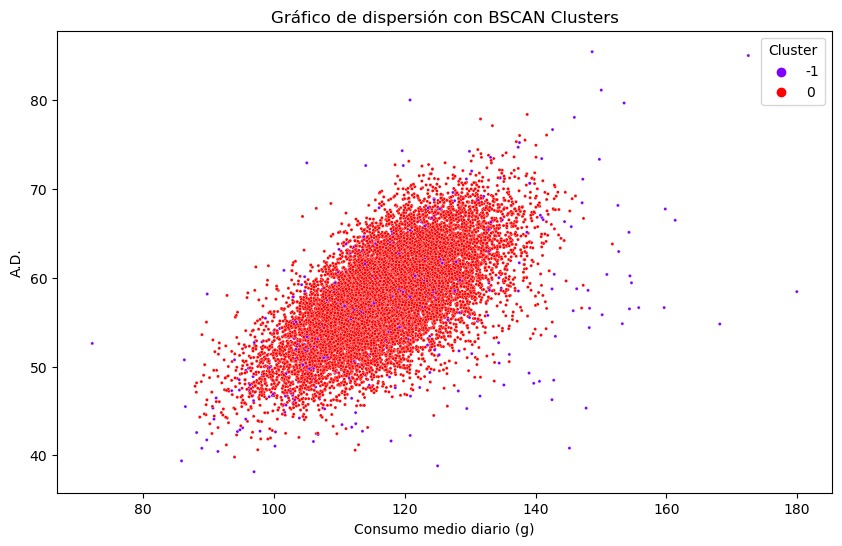

time: 704 ms (started: 2023-08-02 20:00:33 -03:00)


In [171]:
#Gráfico 17
column_y = dfa['A.D.']
column_x = dfa['Consumo medio diario (g)']

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfa, x=column_x, y=column_y, hue='Cluster2', palette='rainbow', s=5)
plt.title('Gráfico de dispersión con BSCAN Clusters')
plt.legend(title='Cluster', loc='best')
plt.show();

La agrupación conformada no resulta de utilidad para el análisis de los datos. Debido a ello se utilizará un modelo de agrupación alternativo.

## K Means

Se utilizará un modelo K-means para ver si hay relación entre los indicadores de manejo y la localidad de producción de las zonas Buenos Aires y Entre Ríos.

## Localidades de Buenos Aires

Se crea un subset que contiene solo las localidades de la provincia de Buenos Aires

In [112]:
dfk=df[['Días de receso corregido','% a 7 Días','Densidad','localidad','zona prod' ]]


time: 15 ms (started: 2023-08-02 19:22:21 -03:00)


Se selecciona Buenos Aires

In [113]:
dfk=dfk[dfk['zona prod'] == 'BA']
dfk=dfk.drop(['zona prod'], axis=1)
dfk.head()

,Días de receso corregido,% a 7 Días,Densidad,localidad
0,14,0.55,12.000000,San Pedro
1,12,0.83,10.454545,Salto
2,11,0.92,9.470000,Chivilcoy
3,9,1.35,10.000000,San Pedro
4,10,0.76,10.769231,Arrecifes


time: 16 ms (started: 2023-08-02 19:22:21 -03:00)


In [114]:
len(dfk['localidad'].unique())

18

time: 0 ns (started: 2023-08-02 19:22:21 -03:00)


Hay 18 localidades de producción en la provincia de Buenos Aires.

### Gráfico de análisis de variables

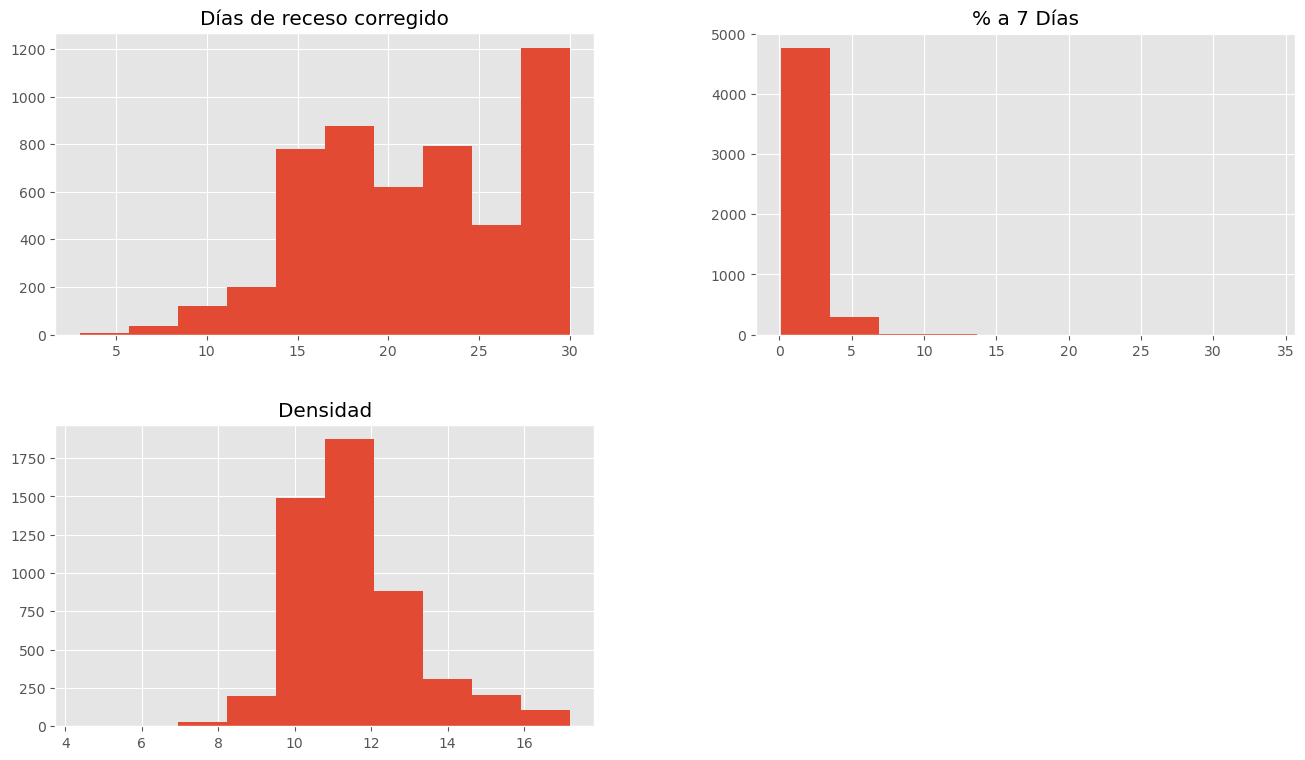

time: 454 ms (started: 2023-08-02 19:22:21 -03:00)


In [115]:
# Gráfico 18 Análisis de las variables

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


dfk.drop(['localidad'],axis=1).hist()
plt.show();

La mayoría de los valores de días de receso es 30 días (este es un valor corregido que registra como 30 cada valor superior a esta cantidad de días). La densidad posee una distribución normal y su valor medio se ubica alrededor de 11 aves/m2. Los valores de mortalidad de primera semana se agrupan casi en su totalidad en valores entre 0 y 4 aproximadamente. 

Se crean las variables independientes y dependientes.

In [116]:
X = np.array(dfk[['% a 7 Días','Días de receso corregido','Densidad']])
y = np.array(dfk['localidad'])
X.shape

(5096, 3)

time: 16 ms (started: 2023-08-02 19:22:21 -03:00)


### Gráfico de correlación entre variables manejo y localidad BA

c:\Users\ebover\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


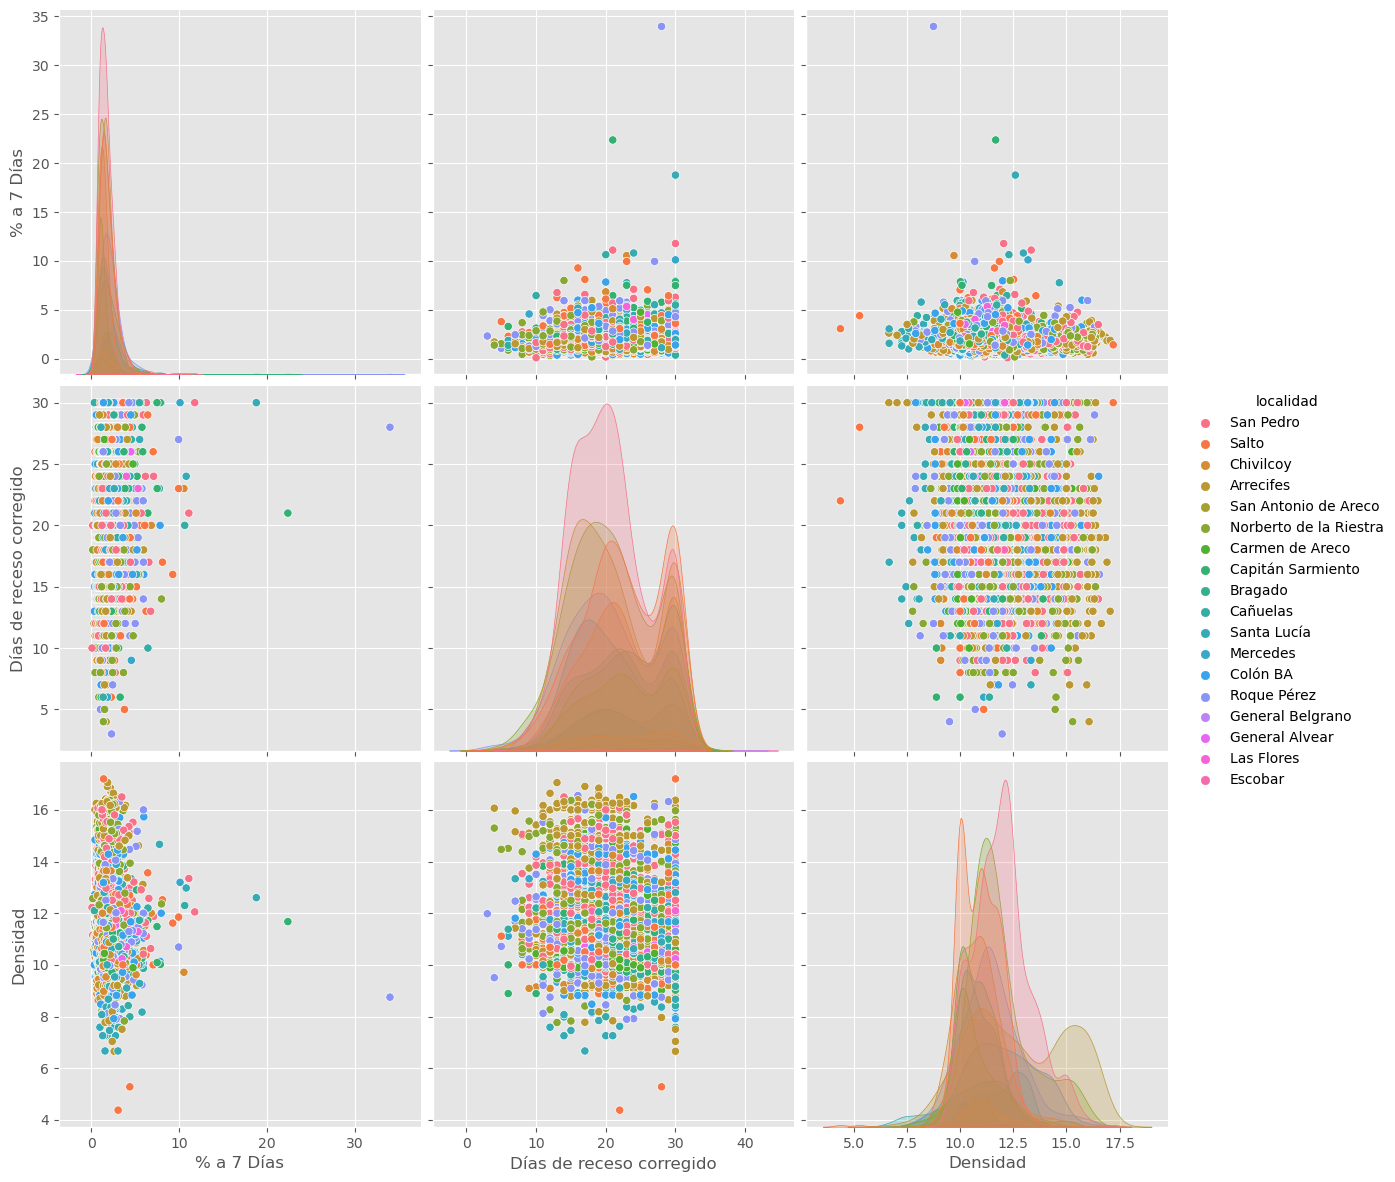

time: 7.88 s (started: 2023-08-02 19:22:21 -03:00)


In [117]:
#Gráfico 19
sns.pairplot(dfk.dropna(), hue='localidad',size=4,vars=['% a 7 Días','Días de receso corregido','Densidad'],kind='scatter');

No habría relación entre las variables seleccionadas y la localidad geográfica.

Se aplica el método del codo para determinar el número de clúster apropiado para el modelo KMeans

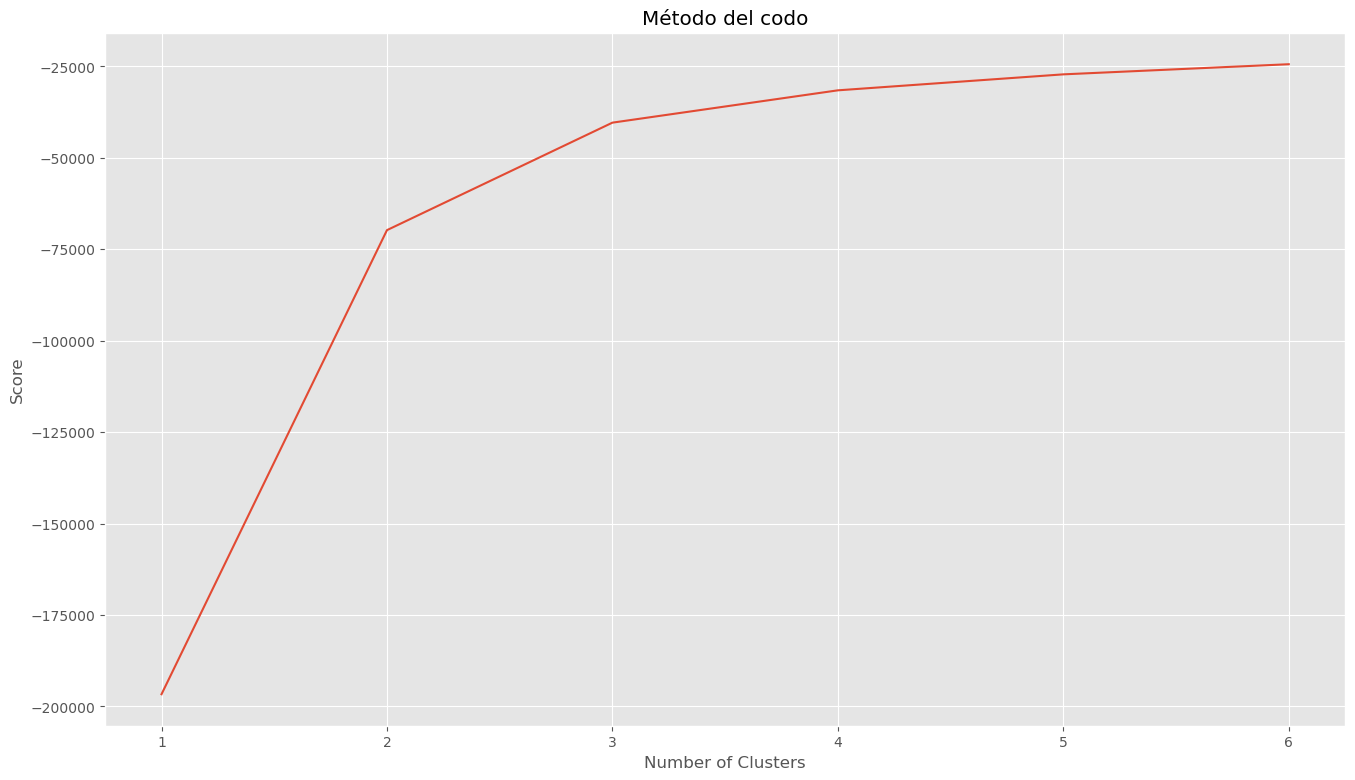

time: 1.72 s (started: 2023-08-02 19:22:29 -03:00)


In [118]:
#Gráfico 20

Nc = range(1, 7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

Se utilizarán 3 clústers para generar el modelo

Se definen los parámetros y se aplica el modelo de Kmeans

In [173]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

time: 328 ms (started: 2023-08-02 20:07:17 -03:00)


In [174]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.27389003 -0.65265566  0.32457783  0.03586985  1.342354    0.04552477]
 [ 0.28138947 -0.06950033 -0.78707052  0.11957119 -0.28287364 -0.74003299]
 [-0.16760905  0.41650173  0.69874002 -0.15050998 -0.3871659   0.79219901]]
time: 500 ms (started: 2023-08-02 20:07:19 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_10868\841774191.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


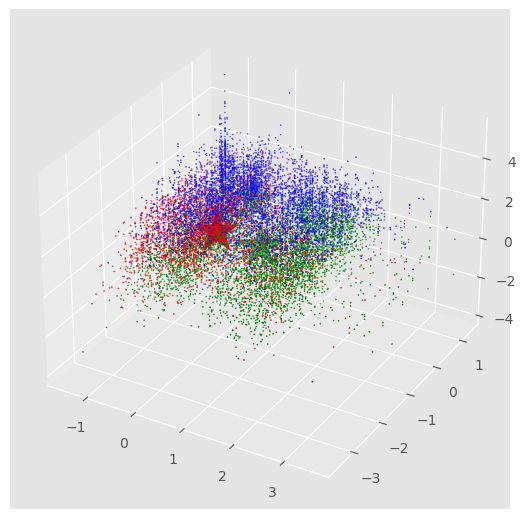

time: 562 ms (started: 2023-08-02 20:07:29 -03:00)


In [175]:
#Gráfico 21
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('ggplot')

# Predicción de clusters
labels = kmeans.predict(X)
# se obtienen los centros
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=0.5)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

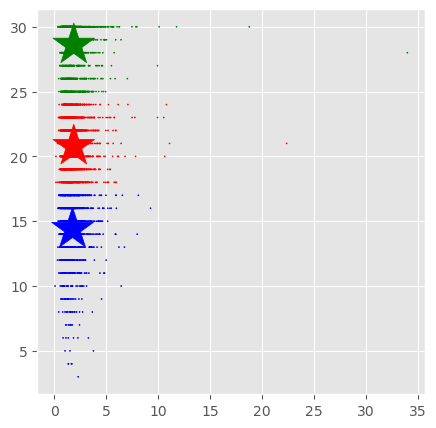

time: 235 ms (started: 2023-08-02 19:22:32 -03:00)


In [122]:
# Gráfico 22
f1 = dfk['% a 7 Días'].values
f2 = dfk['Días de receso corregido'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

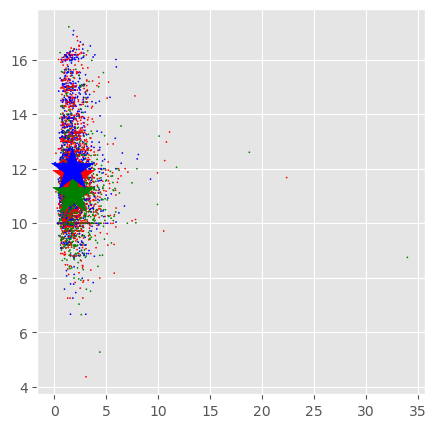

time: 219 ms (started: 2023-08-02 19:22:32 -03:00)


In [123]:
# Gráfico 23
f1 = dfk['% a 7 Días'].values
f2 = dfk['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

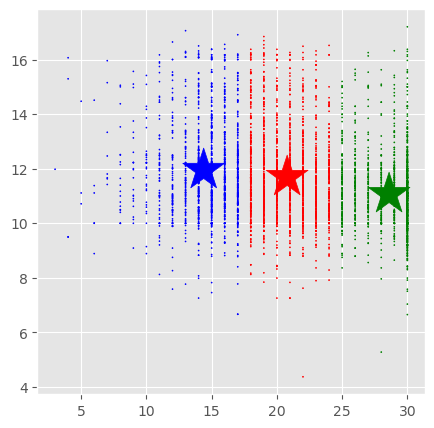

time: 203 ms (started: 2023-08-02 19:22:32 -03:00)


In [124]:
# Gráfico 24
f1 = dfk['Días de receso corregido'].values
f2 = dfk['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Se aplican los clústers generados a cada localidad

In [125]:
copy =  pd.DataFrame()
copy['localidad']=dfk['localidad'].values
copy['label'] = labels
copy

,localidad,label
0,San Pedro,2
1,Salto,2
2,Chivilcoy,2
3,San Pedro,2
4,Arrecifes,2
...,...,...
5091,Roque Pérez,0
5092,San Pedro,0
5093,Roque Pérez,1
5094,Colón BA,1


time: 31 ms (started: 2023-08-02 19:22:33 -03:00)


Se crea un diccionario para identificar los colores

In [126]:
dic2={0:'red',1:'green',2:'blue'}
copy2=copy.replace({'label':dic2})

copy2

,localidad,label
0,San Pedro,blue
1,Salto,blue
2,Chivilcoy,blue
3,San Pedro,blue
4,Arrecifes,blue
...,...,...
5091,Roque Pérez,red
5092,San Pedro,red
5093,Roque Pérez,green
5094,Colón BA,green


time: 31 ms (started: 2023-08-02 19:22:33 -03:00)


Se crea un nuevo subset con las columnas deseadas

In [127]:
# Crea un nuevo dataframe con las columnas deseadas
nuevo_df = pd.pivot_table(copy2, index='localidad', columns='label', aggfunc=len, fill_value=0).reset_index()

# Imprime el nuevo dataframe
print(nuevo_df)

label               localidad  blue  green  red
0                   Arrecifes   219    151  226
1                     Bragado     9     15   20
2           Capitán Sarmiento    56    157  110
3             Carmen de Areco    48     91   88
4                    Cañuelas    25     55   48
5                   Chivilcoy    81    184  168
6                    Colón BA   106     80  132
7                     Escobar     0      1    2
8              General Alvear     2      9    8
9            General Belgrano     0      2    1
10                 Las Flores     0      3    3
11                   Mercedes    27     21   50
12     Norberto de la Riestra   206    192  253
13                Roque Pérez   147    136  176
14                      Salto   120    232  238
15       San Antonio de Areco    14     25   19
16                  San Pedro   267    204  370
17                Santa Lucía    69    109  121
time: 46 ms (started: 2023-08-02 19:22:33 -03:00)


In [128]:
localBA=nuevo_df.drop([1,7,8,9,10,15], axis=0)
localBA

label,localidad,blue,green,red
0,Arrecifes,219,151,226
2,Capitán Sarmiento,56,157,110
3,Carmen de Areco,48,91,88
4,Cañuelas,25,55,48
5,Chivilcoy,81,184,168
6,Colón BA,106,80,132
11,Mercedes,27,21,50
12,Norberto de la Riestra,206,192,253
13,Roque Pérez,147,136,176
14,Salto,120,232,238


time: 31 ms (started: 2023-08-02 19:22:33 -03:00)


<Figure size 1000x600 with 0 Axes>

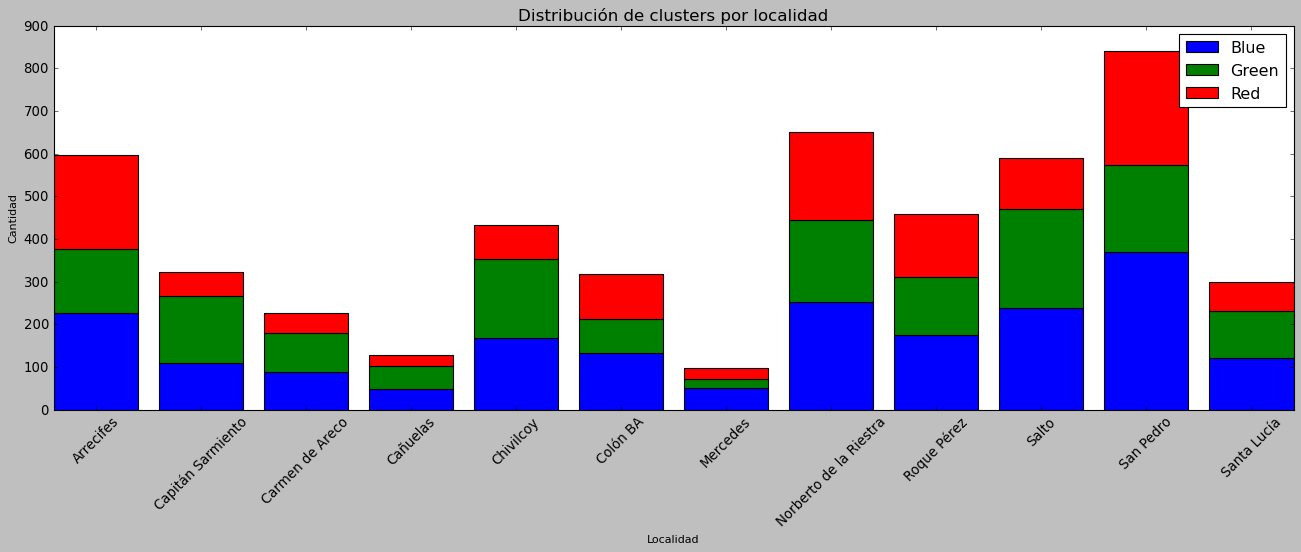

time: 328 ms (started: 2023-08-02 19:22:33 -03:00)


In [129]:
# Gráfico 25
plt.figure(figsize=(10, 6))
plt.style.use('classic')

parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)


# Obtiene los valores para cada categoría de label
red = localBA['red']
green = localBA['green']
blue = localBA['blue']

# Obtiene los nombres de las localidades
localidades = localBA['localidad']


# Configura el tamaño del gráfico
plt.figure(figsize=(20, 6))


# Crea el gráfico de barras apiladas
plt.bar(localidades, red, label='Blue')
plt.bar(localidades, green, bottom=red, label='Green')
plt.bar(localidades, blue, bottom=red+green, label='Red')

# Agrega leyendas y etiquetas
plt.xlabel('Localidad')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.title('Distribución de clusters por localidad')
plt.legend()

# Muestra el gráfico
plt.show();




Si bien no se distribuyen equitativamente, las 3 categorías conformadas por el modelo se encuentran presentes en todas las localidades por lo que la ubicación geográfica de las granjas no tendría una relación directa con la densidad, la mortalidad de primer semana y los días de receso en Buenos Aires.

In [130]:
#Prueba con nuevos valores

X_new = np.array([[2,14,12]]) #valores nuevos de mortalidad, días de receso y densidad
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
time: 31 ms (started: 2023-08-02 19:22:33 -03:00)


Una crianza con esos valores pertenecerá al cluster n2: red

## Localidades de Entre Ríos

Se crea un subset que contiene solo las localidades de la provincia de Entre Ríos y se repiten los pasos del análisis realizado para Buenos Aires

In [131]:
dfk2=df[['Días de receso corregido','% a 7 Días','Densidad','localidad','zona prod']]


time: 15 ms (started: 2023-08-02 19:22:33 -03:00)


In [132]:
dfk2=dfk2[dfk2['zona prod'] == 'ER']
dfk2=dfk2.drop(['zona prod'], axis=1)
dfk2.head()

,Días de receso corregido,% a 7 Días,Densidad,localidad
5335,20,1.42,11.047619,Aldea Asunción
5336,20,1.51,11.885128,Gualeguay
5337,30,1.45,10.000000,Larroque
5338,30,1.10,11.600000,Rocamora
5339,21,0.92,11.000000,Villaguay


time: 16 ms (started: 2023-08-02 19:22:33 -03:00)


In [133]:
len(dfk2['localidad'].unique())

22

time: 0 ns (started: 2023-08-02 19:22:33 -03:00)


Hay 22 localidades de producción en la provincia de Entre Ríos.

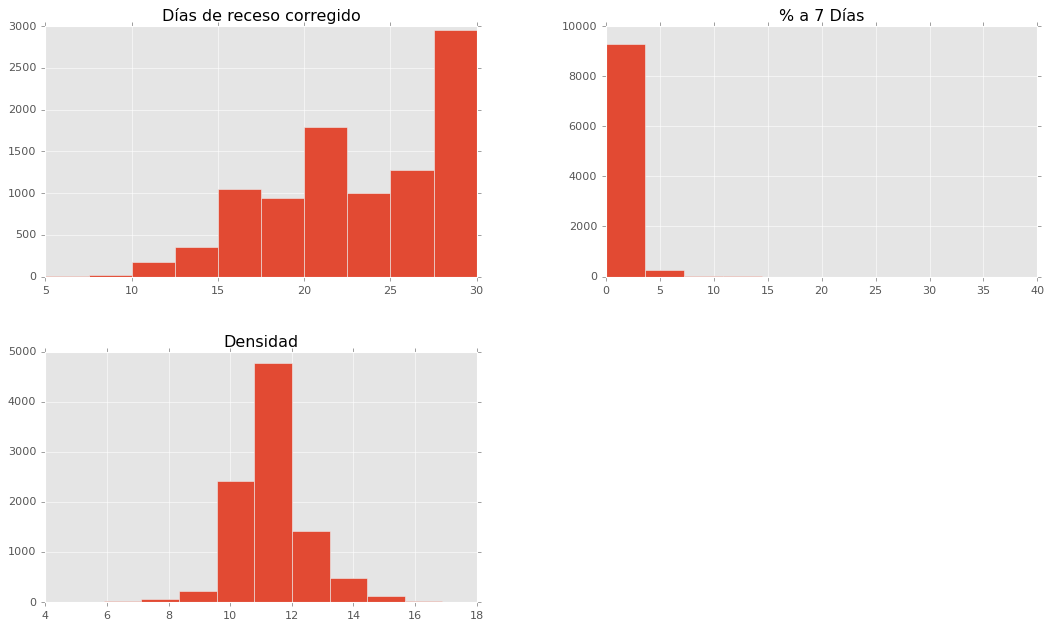

time: 546 ms (started: 2023-08-02 19:22:33 -03:00)


In [134]:
# Gráfico 26 Análisis de las variables

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


dfk2.drop(['localidad'],axis=1).hist()
plt.show();

Al igual que en Buenos Aires, hay dos grupos bien diferenciados de granjas en cuanto a su distancia a la planta de alimentos.La mayoría de los valores de días de receso es 30 días (este es un valor corregido que registra como 30 cada valor superior a esta cantidad de días). La ganancia de peso, la densidad y el consumo poseen una distribución normal. Los valores de mortalidad de primera semana se agrupan casi en su totalidad en valores entre 0 y 4 aproximadamente. 

In [135]:
X = np.array(dfk2[['% a 7 Días','Días de receso corregido','Densidad']])
y = np.array(dfk2['localidad'])
X.shape

(9563, 3)

time: 15 ms (started: 2023-08-02 19:22:34 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


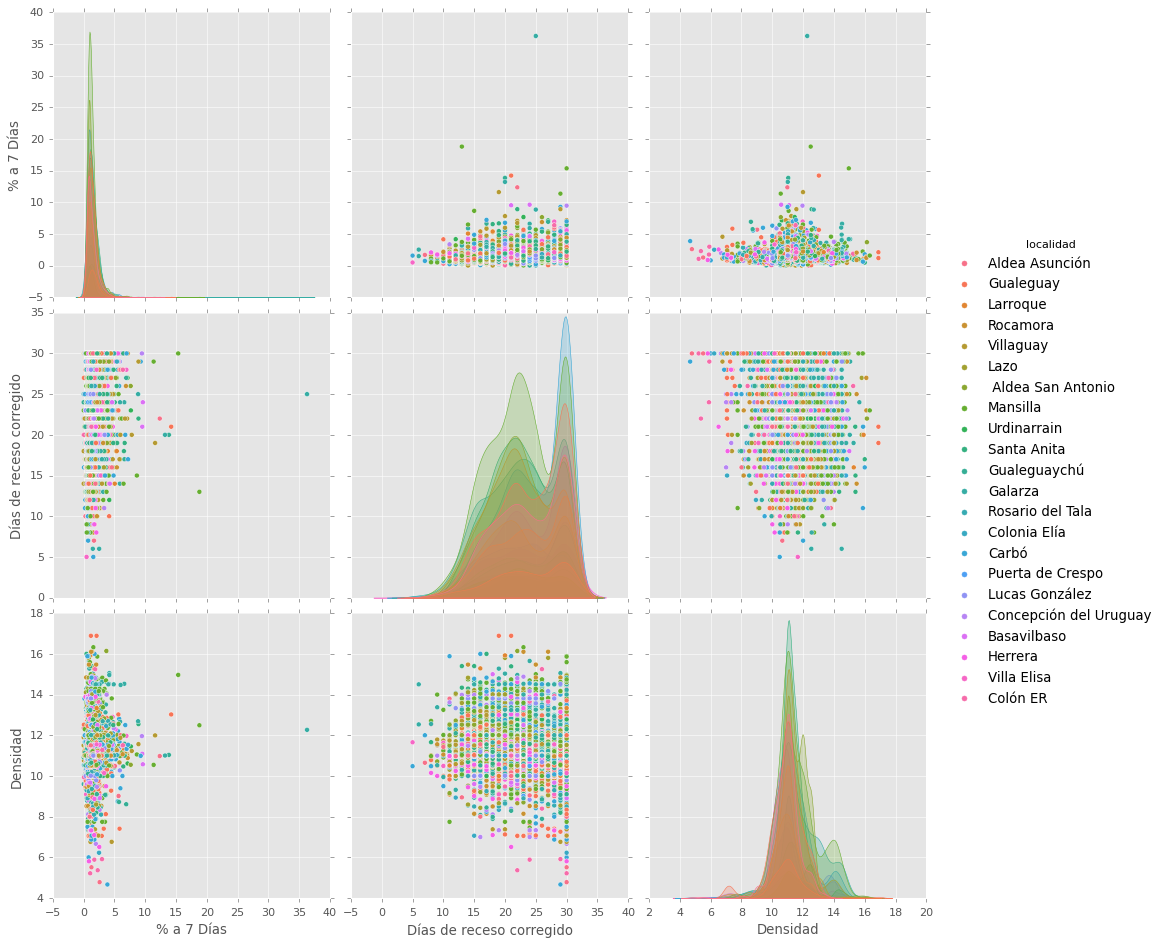

time: 8.45 s (started: 2023-08-02 19:22:34 -03:00)


In [136]:
#Gráfico 27
sns.pairplot(dfk2.dropna(), hue='localidad',size=4,vars=['% a 7 Días','Días de receso corregido','Densidad'],kind='scatter');

No habría relación entre las variables seleccionadas y la localidad geográfica.

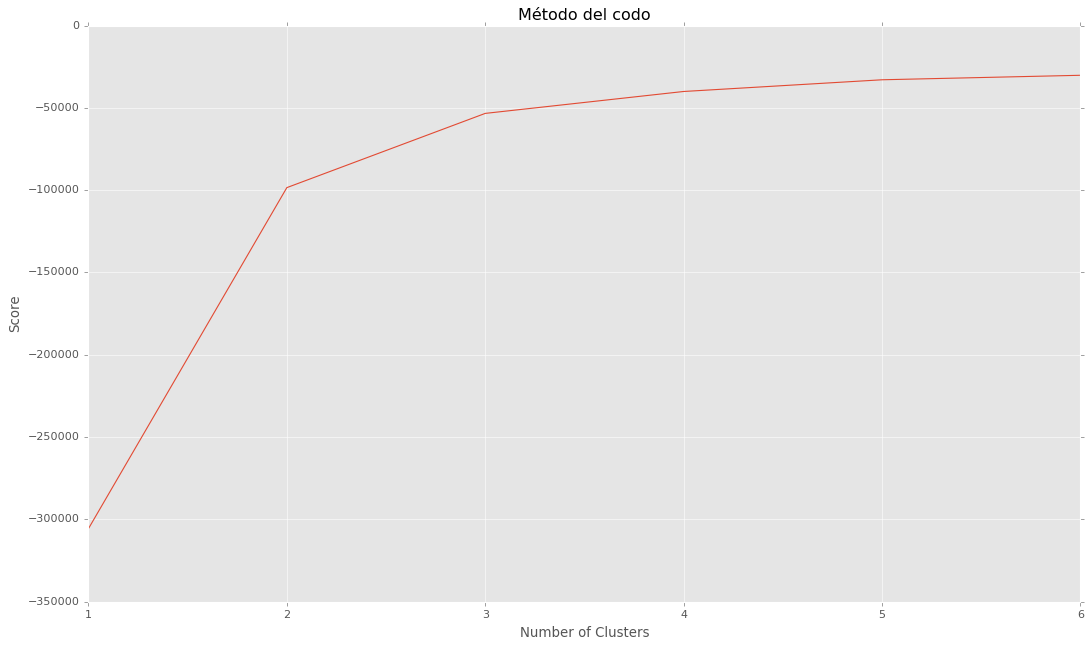

time: 2.19 s (started: 2023-08-02 19:22:42 -03:00)


In [137]:
#Gráfico 28
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
Nc = range(1, 7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

In [138]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

time: 109 ms (started: 2023-08-02 19:22:45 -03:00)


In [139]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.45467873 22.45490196 11.34627381]
 [ 1.51212818 29.00594916 11.097897  ]
 [ 1.36234118 16.17647059 11.35335144]]
time: 110 ms (started: 2023-08-02 19:22:45 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_10868\877177735.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


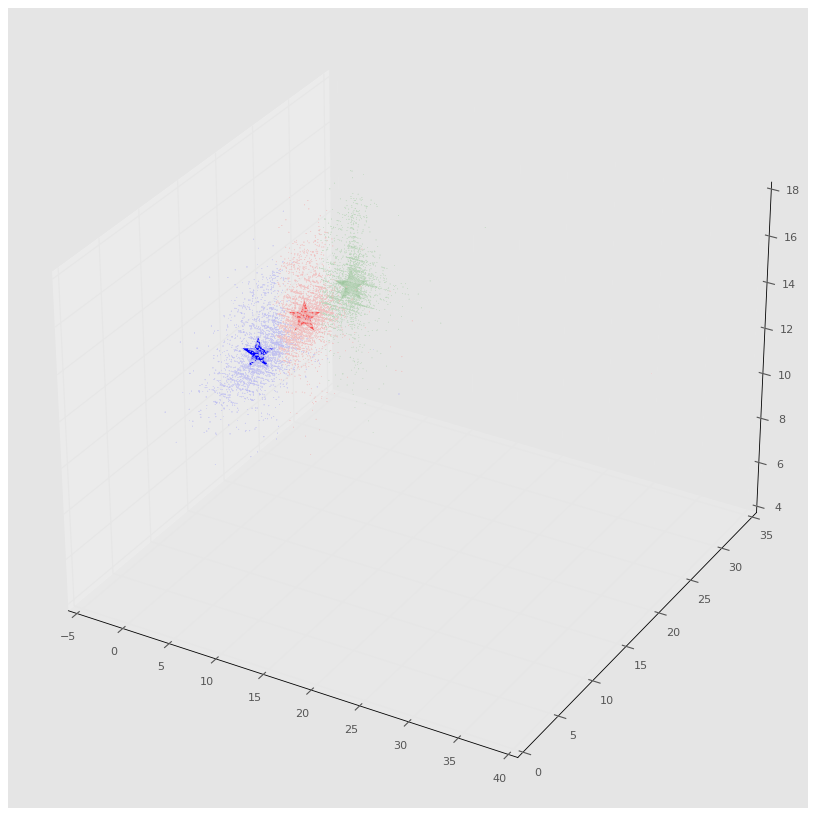

time: 844 ms (started: 2023-08-02 19:22:45 -03:00)


In [140]:
#Gráfico 29
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Predicción the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=0.5)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

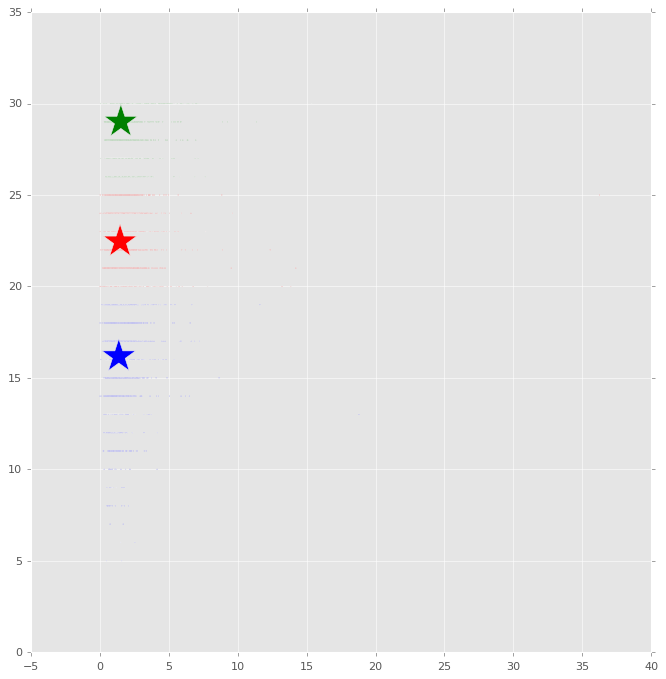

time: 546 ms (started: 2023-08-02 19:22:46 -03:00)


In [141]:
# Gráfico 30
f1 = dfk2['% a 7 Días'].values
f2 = dfk2['Días de receso corregido'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

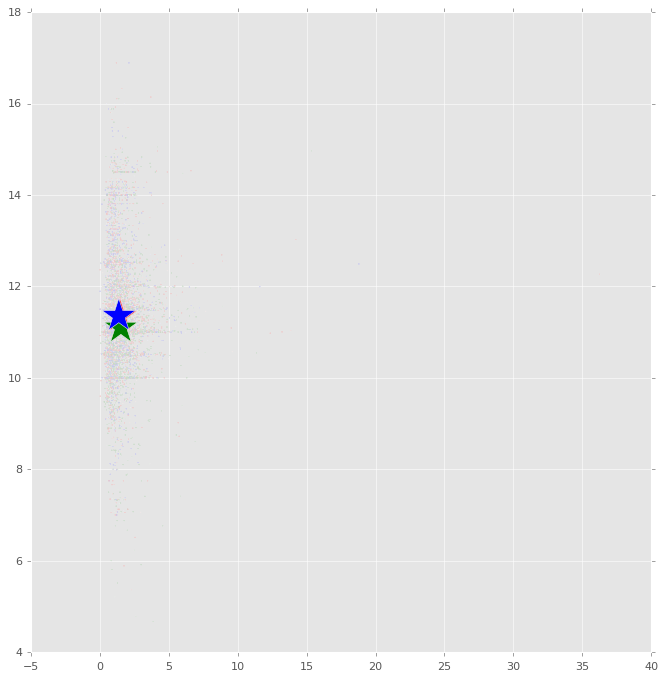

time: 578 ms (started: 2023-08-02 19:22:46 -03:00)


In [142]:
# Gráfico 31
f1 = dfk2['% a 7 Días'].values
f2 = dfk2['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

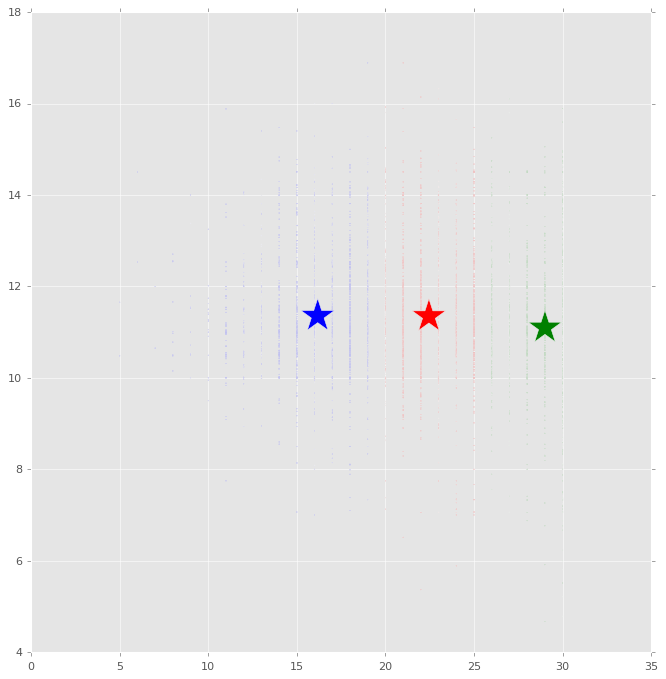

time: 516 ms (started: 2023-08-02 19:22:47 -03:00)


In [143]:
# Gráfico 32
f1 = dfk2['Días de receso corregido'].values
f2 = dfk2['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Se aplican los clústers generados a cada localidad

In [144]:
copy =  pd.DataFrame()
copy['localidad']=dfk2['localidad'].values
copy['label'] = labels
copy

,localidad,label
0,Aldea Asunción,0
1,Gualeguay,0
2,Larroque,1
3,Rocamora,1
4,Villaguay,0
...,...,...
9558,Santa Anita,0
9559,Lucas González,0
9560,Lucas González,1
9561,Lucas González,0


time: 32 ms (started: 2023-08-02 19:22:48 -03:00)


In [145]:
dic2={0:'blue',1:'green',2:'red'}
copy2=copy.replace({'label':dic2})

copy2

,localidad,label
0,Aldea Asunción,blue
1,Gualeguay,blue
2,Larroque,green
3,Rocamora,green
4,Villaguay,blue
...,...,...
9558,Santa Anita,blue
9559,Lucas González,blue
9560,Lucas González,green
9561,Lucas González,blue


time: 47 ms (started: 2023-08-02 19:22:48 -03:00)


In [146]:
# Se crea un nuevo dataframe con las columnas deseadas
nuevo_df = pd.pivot_table(copy2, index='localidad', columns='label', aggfunc=len, fill_value=0).reset_index()

# Se imprime el nuevo dataframe
print(nuevo_df)

label               localidad  blue  green  red
0           Aldea San Antonio   292    235  213
1              Aldea Asunción   178    242  140
2                 Basavilbaso    49     36   35
3                       Carbó   246    408  148
4                Colonia Elía    72    131   57
5                    Colón ER    38     65   16
6      Concepción del Uruguay    99    131   82
7                     Galarza   278    269  244
8                   Gualeguay   215    328  157
9                Gualeguaychú    78     91   59
10                    Herrera   164    244  118
11                   Larroque    54     68   39
12                       Lazo   130    150  121
13             Lucas González   111     85   93
14                   Mansilla   416    365  324
15           Puerta de Crespo    47     32   21
16                   Rocamora   136    172  105
17           Rosario del Tala    42     56   36
18                Santa Anita   299    239  233
19                Urdinarrain    55     

In [147]:
localER=nuevo_df.drop([2,5,15,17], axis=0)
localER

label,localidad,blue,green,red
0,Aldea San Antonio,292,235,213
1,Aldea Asunción,178,242,140
3,Carbó,246,408,148
4,Colonia Elía,72,131,57
6,Concepción del Uruguay,99,131,82
7,Galarza,278,269,244
8,Gualeguay,215,328,157
9,Gualeguaychú,78,91,59
10,Herrera,164,244,118
11,Larroque,54,68,39


time: 16 ms (started: 2023-08-02 19:22:48 -03:00)


<Figure size 1600x480 with 0 Axes>

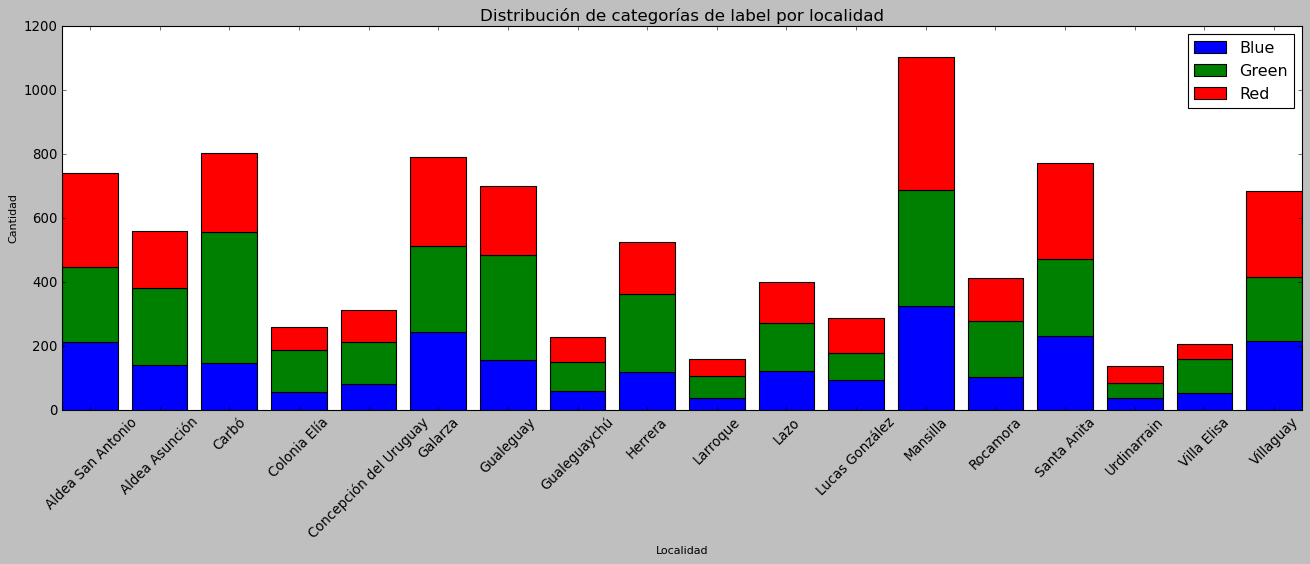

time: 609 ms (started: 2023-08-02 19:22:48 -03:00)


In [148]:
# Gráfico 33
plt.figure(figsize=(20, 6))
plt.style.use('classic')
parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)

# Obtener los valores para cada categoría de label
red = localER['red']
green = localER['green']
blue = localER['blue']

# Obtener los nombres de las localidades
localidades = localER['localidad']


# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 6))

# Crear el gráfico de barras apiladas
plt.bar(localidades, red, label='Blue')
plt.bar(localidades, green, bottom=red, label='Green')
plt.bar(localidades, blue, bottom=red+green, label='Red')

# Agregar leyendas y etiquetas
plt.xlabel('Localidad')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.title('Distribución de categorías de label por localidad')
plt.legend()

# Mostrar el gráfico
plt.show();




Si bien no se distribuyen equitativamente, las 3 categorías conformadas por el modelo se encuentran presentes en todas las localidades por lo que la ubicación geográfica de las granjas no tendría una relación directa con la densidad, la ganancia de peso y los días de receso en Entre Ríos.

In [ ]:
#Prueba con nuevos valores

X_new = np.array([[2,10.5,20]]) #valores nuevos de mortalidad, días de receso y densidad
 
new_labels = kmeans.predict(X_new)
print(new_labels)

Una crianza con esos valores pertenecerá al cluster n2:red

# Conclusiones y consideraciones finales


El objetivo del presente trabajo era detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos.

Del análisis surge que el crecimiento de los pollos parrilleros depende de múltiples factores y no de una única variable. 
El mes de ingreso de las aves a la granja y la estación del año en que se desarrolla la crianza indican que hay un impacto del clima sobre el desempeño. 
El sistema de ventilación de los galpones de tipo ventilación forzada y/o ambiente controlado permite obtener, en promedio, mayores valores de ganancia media diaria de peso.
La zona de producción Crespo tiene mejores resultados productivos pero la cantidad de datos de crianza es mucho menor que el resto de las zonas y, como se observó también, los resultados son diferentes comparando los distintos años productivos, por lo que no es posible concluir que esta zona es mejor por falta de datos.
El consumo de alimento fue la variable que tuvo mayor correlación con la ganancia media diaria de peso, debido a ello se utilizaron modelos de regresión para predecir este indicador, el mes de levante fue la variable de mayor importancia.
Se utilizaron modelos de clasificación creando la variable ganancia que divide en tres partes iguales los valores de ganancia media diaria de peso: buena, regular y mala. Dadas las métricas obtenidas por los diferentes modelos, es posible asumir que las variables relacionadas con la ubicación geográfica, los días de receso, la densidad, la mortalidad de primera semana y la época del año son determinantes para obtener una mejor o peor ganancia diaria de peso.
Finalmente evaluando las localidades geográficas por zona de producción utilizando modelos de agrupación se observó que no hay localidades que tengan resultados de ganancia de peso uniformes (siempre buenos, regulares o malos) si no que todas las posibilidades de resultados están presentes en todas ellas.
